>Importación de Librerias
>
>Antes que todo, iniciaremos con la carga de las siguientes librerias:
>- Pandas
- Numpy
- Matplotlib
- SimpleImputer
- LabelEncoder

In [1]:
# Se realiza la importación de las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import sys
# Preprocesamiento de Datos
from sklearn.impute import SimpleImputer as sim
from sklearn.preprocessing import LabelEncoder as le
# Modelos Predictivos
from sklearn.feature_selection import SelectKBest
import seaborn as sb
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils.multiclass import type_of_target

>Bastara con importar una vez estas librerias en nuestro entorno, lo cual se sabra que han sido importadas y cargadas, en el momento en que pueda ser visualizado un numero entre los corchetes cuadradados `[ ]` del bloque de codigo ejecutado.




# Fase 1 - Entendimiento del Negocio

>Introducción
>
>Se nos designo un proyecto relacionado con la Biblioteca del Congreso Nacional (BCN), es por esto, que debido al proyecto encomendado, nos requirierón realizar ciertos puntos, de los cuales serán la base para posteriores etapas, en donde el proyecto íra atravesando con el tiempo. Por lo tanto, los puntos claves de este documento son:
>
>*  Exploración Inicial de los Datos.
*   Análisis, Transformación y Preprocesamiento de Datos.
*   Analisis Exploratorio Inicial a los Datos.
*   Modelamiento de los Datos.

>En cambio, respecto a la organización y al contexto (en un grado un poco mas profundo) del caso, este esta basado en Datos Extraidos que estaran referenciados a las votaciones realizadas por el senado de Chile. Dicho esto, el conjunto de datos (segun nos informarón), contendra todas las votaciones realizadas por el cuerpo legislativo, desde su ultima eleccion (11-03-2018) hasta el dia 11 de Diciembre del 2020, concluyendo con todas las votaciones publicadas por la BCN.
>
>En este archivo de datos, ademas de tal información propiamente tal sobre la votación, incluira a su vez meta-datos (obtendremos una vista mas clara sobre esto mas adelante), los cuales nos permitiran obtener una mayor descripcion de tales votos por cada tema u otro aspecto el cual tendra relación.

## Carga de los Datos

>Si bien existen diversas formas de realizar una carga de los datos, ya sea mediante una URL, Google Drive, o bien consiguiendo tal archivo de forma local en nuestra computadora, en dicho caso se determino utilizar esta ultima opcion, dejando esta eleccion, simplemente por el hecho de que se piensa de que es la mas sencilla y mejor escogida para un funcionamiendo de los datos, sin necesitar permisos para ser utilizados en el drive, como por ejemplo.             
>Es por esto, que se realizo el siguiente codigo, para cumplir con tal objetivo.

In [2]:
#Se menciona que desde el "ambiente" de google colab se importaran archivos, quienes seran cargados en la variable "uploaded"
from google.colab import files
uploaded = files.upload()

Saving Anexo Forma A_senate2020 (1).pkl to Anexo Forma A_senate2020 (1).pkl


## Lectura de los Datos

>Ya realizado la carga de estos mismos, procederemos a la lectura de estos, la cual se guardaria en una variable para luego ser utilizada en los analisis propuestos.

In [3]:
#Lectura del archivo cargado y almacenado en la variable "df"
df = pd.read_pickle("Anexo Forma A_senate2020 (1).pkl")

>Ya realizado dicha carga y lectura de datos, nos introduciremos a la exploracion de datos, en donde crearemos diversos Data Frames con Pandas (La Libreria), que nos permitira realizar un analisis y preprocesamiento a estos mismos datos.

# Fase 2 - Entendimiento de los Datos

> Si hay algo que es importante en el guardado de datos como lo pueden ser el de este proyecto, es la de sacar provecho y valor a tanta información guardada. Es por esto que uno de los "primeros" pasos para comenzar dicha declaración de valor de los datos, es análizarlos y preprocesarlos, esto con el fin de convertir dicha data en un Data Set, que se encuentre lo mas preparado para poder encontrar variados resultados reales, permitiendo interpretarlos de modo que estos sean el comienzo de algo mas grande.
>
> Asi bien, el proyecto que da como tema central, las elecciones realizadas por el cuerpo legislativo, dara a visualizar de maneras diversas, medidas relevantes para este analisis, comenzando por el Tratamiento y Transformación de ciertos valores, para posteriormente dirigirnos a un enfoque mas análitico.

## Primera Interacción con los Datos 

>Existiran diversas formas de realizar analisis a los datos, pero una por las cuales se empezara, es la de visualizar el DataFrame del archivo de forma general (tal como está), utilizando la variable `df`, como la variable que se utilizo para guardar el archivo de datos cargado anteriormente. Esto principalmente, para saber como estan distribuidos los datos en su inicio.  
>
>Asi bien, como se podra observar mas adelante, el archivo de datos (si se ejecuta tal codigo por debajo) se encuentra unido entre 2 dataframe, lo cual constituye un desorden para posteriores graficos y analisis de estos mismos.




In [4]:
df

0    ...                                                424
data     Latorre R., Juan Ignacio                                                        Si  ...                                                 Si
         Coloma C., Juan Antonio                                                         Si  ...                                                NaN
         García R., José                                                                 Si  ...                                                 Si
         Bianchi C., Carlos                                                              Si  ...                                                NaN
         Navarro B., Alejandro                                                           Si  ...                                                NaN
         Allende B., Isabel                                                              Si  ...                                                 Si
         Lagos W., Ricardo                                                               Si  ...                                                NaN
         García Huidobro S., Alejandro                                                   Si  ...                                                 Si
         Guillier Á., Alejandro                                                       Pareo  ...                                                NaN
         Durana S., José Miguel                                                          Si  ...                                                 No
         Prohens E., Rafael                                                              Si  ...                                                 Si
         Pugh O., Kenneth                                                                Si  ...                                                 Si
         Elizalde S., Alvaro                                                             Si  ...                                                 Si
         Galilea V., Rodrigo                                                             Si  ...                                                NaN
         Huenchumilla J., Francisco                                                      Si  ...                                                 Si
         Sandoval P., David                                                              Si  ...                                                 Si
         Pizarro S., Jorge                                                              NaN  ...                                                NaN
         Girardi L., Guido                                                              NaN  ...                                                NaN
         Letelier M., Juan Pablo                                                        NaN  ...                                                 Si
         Pérez V., Víctor                                                               NaN  ...                                                NaN
         Chahuán C., Francisco                                                          NaN  ...                                                NaN
         Quintana L., Jaime                                                             NaN  ...                                                NaN
         Rincón G., Ximena                                                              NaN  ...                                                 Si
         Von Baer J., Ena                                                               NaN  ...                                                 Si
         Araya G., Pedro                                                                NaN  ...                                                 Si
         Van Rysselberghe H., Jacqueline                                                NaN  ...                                                 Si
         Goic B., Carolina                                                              NaN 

>Es por esto, que se procedio a realizar la división de estos, entre datos catalogados como "Votos"(data) y "Detalle del Voto" (metadata).



>En dicha division ademas de utilizar la variable `df`, se utilizo la propiedad `.T`, la cual sirve para invertir las columnas por la filas (o viceversa), esto principalmente para obtener una mejor lectura o interpretacion del dataframe.
>
>Asi bien, comenzamos por visualizar la informacion del dataframe de "Votos".

In [5]:
#Guardado de la data en "votos" para postereior visualizaciòn de la informacion del mismo Data Set
votos = df.T.data
votos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 424
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Latorre R., Juan Ignacio         383 non-null    object
 1   Coloma C., Juan Antonio          329 non-null    object
 2   García R., José                  324 non-null    object
 3   Bianchi C., Carlos               294 non-null    object
 4   Navarro B., Alejandro            273 non-null    object
 5   Allende B., Isabel               274 non-null    object
 6   Lagos W., Ricardo                260 non-null    object
 7   García Huidobro S., Alejandro    324 non-null    object
 8   Guillier Á., Alejandro           301 non-null    object
 9   Durana S., José Miguel           385 non-null    object
 10  Prohens E., Rafael               327 non-null    object
 11  Pugh O., Kenneth                 351 non-null    object
 12  Elizalde S., Alvaro              380

**Análisis**

>Es de observar que dicho Data Set `votos` presenta un total de 45 columnas de tipo objecto.

In [6]:
#Visualizar las 5 primeras columnas del DataFrame Votos.
votos.head()

,"Latorre R., Juan Ignacio","Coloma C., Juan Antonio","García R., José","Bianchi C., Carlos","Navarro B., Alejandro","Allende B., Isabel","Lagos W., Ricardo","García Huidobro S., Alejandro","Guillier Á., Alejandro","Durana S., José Miguel","Prohens E., Rafael","Pugh O., Kenneth","Elizalde S., Alvaro","Galilea V., Rodrigo","Huenchumilla J., Francisco","Sandoval P., David","Pizarro S., Jorge","Girardi L., Guido","Letelier M., Juan Pablo","Pérez V., Víctor","Chahuán C., Francisco","Quintana L., Jaime","Rincón G., Ximena","Von Baer J., Ena","Araya G., Pedro","Van Rysselberghe H., Jacqueline","Goic B., Carolina","Harboe B., Felipe","De Urresti L., Alfonso","Quinteros L., Rabindranath","Moreira B., Iván","Muñoz D., Adriana","Ossandón I., Manuel José","Insulza S., José Miguel","Ebensperger O., Luz Eliana","Soria Q., Jorge","Provoste C., Yasna","Castro P., Juan","Aravena A., Carmen Gloria","Kast S., Felipe","Órdenes N., Ximena","Allamand Z., Andrés","Montes C., Carlos","Alvarado A., Claudio","Sabat F., Marcela"
0,Si,Si,Si,Si,Si,Si,Si,Si,Pareo,Si,Si,Si,Si,Si,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,NaN,Si,Si,Si,Si,NaN,NaN,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,NaN,NaN,NaN
2,Si,Si,Si,Si,NaN,Si,Si,Si,Si,NaN,Si,NaN,Si,Pareo,Si,Si,Si,Si,Si,NaN,Si,Si,NaN,Si,NaN,Abstencion,NaN,NaN,Si,Si,NaN,NaN,Si,NaN,Si,Si,NaN,NaN,Si,Si,NaN,Si,Si,NaN,NaN
3,Si,Si,Si,Si,Si,NaN,NaN,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,NaN,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,NaN
4,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,Si,Si,Si,Si,Si,Si,NaN,Si,Si,Si,NaN,Si,NaN,NaN,NaN,Si,Si,Si,NaN,Si,Si,Si,NaN,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,NaN


**Análisis**
>Se puede observar que gran parte de los datos, se encuentran con tipos de datos NaN, los cuales no nos indican de forma exacta su significado (si se refiere a un SI, NO o Abstención), dando como resultado el determinar que no son un tipo de dato numerico.

>Y finalizamos con la visualizacion sobre la informacion del dataframe "Detalle de Voto" (La Metadata)

In [7]:
#Guardado de la data en "detallevoto" para postereior visualizaciòn de la informacion del mismo Data Set
detalleVoto = df.T.metadata
detalleVoto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 424
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ABSTENCION    424 non-null    object        
 1   ETAPA         424 non-null    object        
 2   FECHA         424 non-null    datetime64[ns]
 3   NO            424 non-null    object        
 4   PAREO         424 non-null    object        
 5   QUORUM        413 non-null    object        
 6   SESION        424 non-null    object        
 7   SI            424 non-null    object        
 8   TEMA          423 non-null    object        
 9   TIPOVOTACION  421 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 56.4+ KB


**Análisis**
>Es de denotar, que la columna QUORUM, TEMA y TIPOVOTACION, presenta ciertos valores null.

In [8]:
#Visualizar las 5 primeras filas del DataFrame detalleVoto.
detalleVoto = df.T.metadata
detalleVoto.head(5)

,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,0,Primer trámite constitucional,2020-06-02,1,0,None,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular


****Análisis****

> Se puede observar sobre el mismo dataframe, que entre las primeras 5 filas, nos encontramos con una amplia cantidad de votaciones catalogadas como "SI", sobre las votaciones catalogadas como "NO", "PAREO" y/o "Abstencion".

### Exploracion de Datos

>Luego de obtener una vista general sin mayor detalle en dicho Data Set, esque procederemos a la exploracion de dichos datos, de una forma introductoria para lo que posteriormente se irá realizando con dichos datos. Por consiguiente, esque comenzaremos por conocer el Tamaño de los Data Set.


#### Tamaño del DataSet

> De acuerdo al DataFrame planteado, podremos visualizar ciertas cantidades de columna y filas, de las cuales los siguientes datos estarian establecidos tanto para el DataSet *votos*, como para el del *detalleVoto*.

> Asi bien, se decidio solamente mostrar estos DataFrame de forma separada, ya que creemos que podria tener mucho mas valor, a la hora de la informacion que podriamos obtener, en vez de visualizarlo en forma conjunta, como lo seria con la variable *df*.







In [9]:
#Numero de columnas y filas del DataSet Votos
np.shape(votos)

(424, 45)

**Análisis**

> El Data Set *votos*, presenta un total de 45 columnas (o features), y 424 filas de datos.



In [10]:
#Numero de columnas y filas del DataSet detalleVoto
np.shape(detalleVoto)

(424, 10)

**Análisis**

> El Data Set *detalleVoto*, presenta un total de 10 columnas (o features), y 424 filas de datos.



#### Tipos de Datos de la Columnas

> Tambien continuaremos con mostrar los tipos de datos que presenta cada Feature de cada Data Set, tanto para el denominado *votos* y *detalleVoto*.





In [11]:
#Tipos de datos del DataFrame Votos
votos.dtypes

Latorre R., Juan Ignacio           object
Coloma C., Juan Antonio            object
García R., José                    object
Bianchi C., Carlos                 object
Navarro B., Alejandro              object
Allende B., Isabel                 object
Lagos W., Ricardo                  object
García Huidobro S., Alejandro      object
Guillier Á., Alejandro             object
Durana S., José Miguel             object
Prohens E., Rafael                 object
Pugh O., Kenneth                   object
Elizalde S., Alvaro                object
Galilea V., Rodrigo                object
Huenchumilla J., Francisco         object
Sandoval P., David                 object
Pizarro S., Jorge                  object
Girardi L., Guido                  object
Letelier M., Juan Pablo            object
Pérez V., Víctor                   object
Chahuán C., Francisco              object
Quintana L., Jaime                 object
Rincón G., Ximena                  object
Von Baer J., Ena                  

**Análisis**

> Se concluye que el data set en su totalidad, presenta solo valores de tipo Objeto.



In [12]:
#Tipos de datos del Data Set detalleVoto
detalleVoto.dtypes

ABSTENCION              object
ETAPA                   object
FECHA           datetime64[ns]
NO                      object
PAREO                   object
QUORUM                  object
SESION                  object
SI                      object
TEMA                    object
TIPOVOTACION            object
dtype: object

**Análisis**

> Se concluye que el data set en su gran mayoria, presenta valores de tipo Objeto, sin embargo, la columna *FECHA* presenta un tipo de dato *datetime64[ns]*.

#### Valores Nulos o NaN

> En cada DataSet de datos, nos podemos encontrar con ciertos valores que no podran aportar mucho al Analisis de Datos, de los cuales nos estamos refiriendo a los valores NaN o None (que posteriormente, tambien seran vistos y tratados mas adelante), es por esto, que se debera tener cierto conocimiento de la cantidad de valores NaN que presentan cada Columna del DataFrame `detalleVotos`, el cual seria el mas relevante a la hora de ejecutar ciertos análisis a futuro. Sin embargo, no por lo mencionado, dejaremos a un lado al Data Set `votos`, ya que si bien este no se ocupara en todo momento, en relacion a sus datos, mientras mayor informacion de los datos obtengamos, sera mucho mejor.

In [13]:
#Visualizacion del Total de Datos NaN por Columna del DataFrame detalleVoto
for feature in detalleVoto.columns:
  print('Total de valores NaN de', feature, '=', detalleVoto[feature].isna().sum())

Total de valores NaN de ABSTENCION = 0
Total de valores NaN de ETAPA = 0
Total de valores NaN de FECHA = 0
Total de valores NaN de NO = 0
Total de valores NaN de PAREO = 0
Total de valores NaN de QUORUM = 11
Total de valores NaN de SESION = 0
Total de valores NaN de SI = 0
Total de valores NaN de TEMA = 1
Total de valores NaN de TIPOVOTACION = 3


**Análisis**

> De acuerdo a lo observado, se puede concluir que en la columna *QUORUM*, encontraremos un total de 11 valores NaN (o None) en dicha Feature. Lo cual, en comparación a las demas columnas, esta es la que presenta la mayor cantidad de valores NaN, en el DataSet `detalleVoto`.



In [14]:
#Visualizacion del Total de Datos NaN por Columna del DataFrame Votos
for feature in votos.columns:
  print('Total de valores NaN de las votaciones de los Senadores; ', feature, '=', votos[feature].isna().sum())

Total de valores NaN de las votaciones de los Senadores;  Latorre R., Juan Ignacio = 41
Total de valores NaN de las votaciones de los Senadores;  Coloma C., Juan Antonio = 95
Total de valores NaN de las votaciones de los Senadores;  García R., José = 100
Total de valores NaN de las votaciones de los Senadores;  Bianchi C., Carlos = 130
Total de valores NaN de las votaciones de los Senadores;  Navarro B., Alejandro = 151
Total de valores NaN de las votaciones de los Senadores;  Allende B., Isabel = 150
Total de valores NaN de las votaciones de los Senadores;  Lagos W., Ricardo = 164
Total de valores NaN de las votaciones de los Senadores;  García Huidobro S., Alejandro = 100
Total de valores NaN de las votaciones de los Senadores;  Guillier Á., Alejandro = 123
Total de valores NaN de las votaciones de los Senadores;  Durana S., José Miguel = 39
Total de valores NaN de las votaciones de los Senadores;  Prohens E., Rafael = 97
Total de valores NaN de las votaciones de los Senadores;  Pugh

**Análisis**

> Segun las votaciones realizadas, se observa que la gran cantidad obtuvo valores Nulos (o NaN), por lo cual, el senador con mas valores Nulos es *Alvarado A., Claudio*, el cual presenta una cantidad de 396 votos nulos.



##Analisis Exploratorio Inicial a los Datos
>Si bien, como se pudo visualizar, obtuvimos 2 DataFrames (uno dedicado a los Votos como tal, y otro al detalle de este mismo), para obtener los diversos resultados posteriores, seleccionaremos el "DataFrame" *metadata*, nombrado como `detalleVoto`, el cual nos mostrara una mejor variedad de los datos, para lo que se realizara.
>
>De acuerdo a tales datos es que se realizaran diversos analisis, los cuales incluyen estudios declarados como interpretaciones en base a ciertos valores, que estaran presentes en las diferentes `Medidas de Tendencia y Dispersión` conocidos, sin dejar de lado a los graficos, quienes nos mostraran de una forma mas representativa información crucial para un mejor valor a esta misma.
>
>Asi bien, para introducir esta seccion, se mostrara una informacion estadistica de forma general (del DataFrame seleccionado), en donde posteriormente ciertas medidas serán interpretadas individualmente, de acuerdo a la columna seleccionada para tal ejercicio.


In [15]:
detalleVoto

,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,0,Primer trámite constitucional,2020-06-02,1,0,None,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular
...,...,...,...,...,...,...,...,...,...,...
420,4,Primer trámite constitucional,2020-09-01,0,0,None,79/368,33,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general
421,3,Segundo trámite constitucional,2020-09-08,0,0,Mayoría simple,84/368,35,"Aprobación, en general y particular, del proye...",Discusión general
422,4,Segundo trámite constitucional,2019-04-10,7,0,Mayoría simple,9/367,25,"Proyecto de ley, en segundo trámite constituci...",Discusión general
423,1,Segundo trámite constitucional,2019-06-11,4,0,Mayoría simple,24/367,33,"Proyecto de ley, en segundo trámite constituci...",Discusión particular


In [16]:
#Convertimos datos de tipo objeto que deberian ser numericos y utilizamos ".describe()" para la estadsitica descriptiva de estos datos.
detvot_est = detalleVoto.astype({"ABSTENCION" : int, "NO" : int, "PAREO" : int, "SI" : int})
detvot_est.describe(datetime_is_numeric=True)

,ABSTENCION,FECHA,NO,PAREO,SI
count,424.000000,424,424.000000,424.000000,424.000000
mean,1.066038,2019-06-15 13:24:54.339622144,2.365566,0.205189,27.497642
min,0.000000,2018-03-13 00:00:00,0.000000,0.000000,0.000000
25%,0.000000,2018-10-16 18:00:00,0.000000,0.000000,23.000000
50%,0.000000,2019-06-05 00:00:00,0.000000,0.000000,29.000000
75%,1.000000,2020-01-13 06:00:00,1.000000,0.000000,34.000000
max,14.000000,2020-12-02 00:00:00,39.000000,3.000000,39.000000
std,2.077773,NaN,5.928721,0.503295,8.116177


>De acuerdo al resumen de la estadistica descriptiva mostrada, se quiere dejar en claro ciertos aspectos de lo determinado, entre ellos el parametro usado en el `.describe()`, que para este caso se utilizo:
>*   **datetime_is_numeric**: Es otro parametro integrado a "describe" en donde lo que produce, esque principalmente reconosca la columna fecha como un numero, y asi el mismo bloque de codigo no visualiza una alerta sobre posibles cambios a futuro sobre datos de este tipo. Ademas tambien permite la obtencion de las Medidas de Tendencia no Central.                   
>
> Por otro lado, se determino en convertir ciertos valores del Data Set en numericos, por el hecho de que estos datos simplemente por su "naturaleza" deberian de ser numericos y no de dicho tipo objeto, asi bien, lo que se realizo fue optar por tomar esta dsición. Cabe recalcar, que además de tomar en cuenta dicho aspecto, también se integraron a la conversión solamente las columnas que podrian mostrar ciertos valores utiles o que puedieran aportar con algún conocimiento para la proxima interpretación.





**Interpretación**
>Se concluye que la columna *SI*, referente a las votaciones catalagodas con dicha opción al mismo titulo de esta, obtuvo un promedio de 27 votos *SI* respecto a cada tema de la cual constaba la votación.

>Por otro lado, en dichas votaciones el *ETAPA_NUM*, se concluye con que el 
50% de los datos estan por debajo de una Etapa denominada por *Segundo trámite constitucional* el cual corresponde al numero 5 en dicha columna.

>Tambien se pudo observar que las columnas con datos no numericos, referenciado a datos de tipo *DateTime*, no obtuvierón resultados en filas, como las que pertenecen a:
>*   **Std**: Desviación Estandar 

>Estos resultados, además de remarcarnos con que dichas medidas necesitan de datos numericos, posiblemente es por el tipo de dato que simplemente no esta "pensado" para ser utilizado (por lo menos por el posible lenguaje de programación) para obtener resultados como para dichas medidas.

###Medidas de Tendencia Central

> Las medidas de tendencia central, son valores que generalmente se ubican en la parte central de la distribución de datos. Estas medidas son usadas para variables cuantitativas, aportando una idea acerca del comportamiento de la variable. Entre las medidas de tendencia central más importantes podemos encontrar:



####Moda
> La moda es el dato que tiene mayor frecuencia, o bien es el dato que más se repite.





In [17]:
#Almacenamos la moda de tales conjuntos de datos
moda_detvt_SI = detvot_est['SI'].mode()
moda_detvt_TP = detvot_est['TIPOVOTACION'].mode()
#Creamos un dataframe para mostrar la moda de los votos catalogados como "SI" y tambien del "TIPO_VOTACION"
rest = pd.DataFrame({ 'Medida' : ['Moda'],'Votos SI': moda_detvt_SI, 'TIPO_VOTACION': moda_detvt_TP})
rest


,Medida,Votos SI,TIPO_VOTACION
0,Moda,35,Discusión general


**Interpretación**

> El total de votaciones como "SI" de las elecciones del cuerpo legislativo (en base a un cierto tema determinado) más frecuentes, ocurridas en su ultima eleccion para el periodo 2018 al 2020, es 35.

> El tipo de votaciones de las elecciones por el cuerpo legislativo más frecuentes, ocurridas en su ultima eleccion para el periodo 2018 al 2020, es Discusión general.




####Mediana

> La mediana, es el valor que se encuentra en el centro de un conjunto de datos, cuando estos se ordenan de menor a mayor.


In [18]:
#Almacenamos la mediana de tal conjunto de datos.
med_detvt_SI = detvot_est['SI'].median()
#Creamos un dataframe para mostrar la mediana de los votos catalogados como "SI".
rest = pd.DataFrame({  'Medida': ['Mediana'], 'Votos SI': med_detvt_SI})
rest

,Medida,Votos SI
0,Mediana,29.0


**Interpretación**

> El 50% del cuerpo legislativo registran un número de votos como "SI", menor o igual a 29.




####Media Aritmetica o Promedio

> Las media o promedio, es el valor que está en el centro de equilibrio de un conjunto de *observaciones*. Se calcula sumando todos los valores y dividiendo por el número de datos.




In [19]:
detalleVoto

,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,0,Primer trámite constitucional,2020-06-02,1,0,None,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular
...,...,...,...,...,...,...,...,...,...,...
420,4,Primer trámite constitucional,2020-09-01,0,0,None,79/368,33,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general
421,3,Segundo trámite constitucional,2020-09-08,0,0,Mayoría simple,84/368,35,"Aprobación, en general y particular, del proye...",Discusión general
422,4,Segundo trámite constitucional,2019-04-10,7,0,Mayoría simple,9/367,25,"Proyecto de ley, en segundo trámite constituci...",Discusión general
423,1,Segundo trámite constitucional,2019-06-11,4,0,Mayoría simple,24/367,33,"Proyecto de ley, en segundo trámite constituci...",Discusión particular


In [20]:
#Almacenamos la media de tal conjunto de datos.
media_detvt_SI = detvot_est['SI'].mean()
#Creamos un dataframe para mostrar la media de las etapas sobre un tema determinado en dichas votaciones.
rest = pd.DataFrame({  'Medida': ['Media'], 'Votos SI': media_detvt_SI})
rest

,Medida,Votos SI
0,Media,27.497642


**Interpretación**

> La total de votaciones como "SI" promedio de los votantes es de 27 votos.


###Medidas de Tendencia no Central

>Si bien examinamos ciertos numeros los cuales nos mostraban el centro de la distribución, de una serie de valores en base a observaciones, tambien es relevante conocer, ciertos puntos caracteristicos los cuales nos señalen, la divisón de un conjunto de numeros agrupados, en base a ciertos valores, de una serie de datos de forma ordenada. Para esto, esque se analizaran los cuartiles, quintiles, deciles y percentiles.

####Cuantiles





> Debido a que esta medida se divide en 4 formas de obtener diversos resultados, esque estas estan catalogadas por:
> *   Cuartiles
*   Quintiles
*   Deciles
*   Percentiles



#####Cuartiles

> Los cuartiles se componen de 3 partes, los cuales se nombran como *primer cuartil (25%)*, *segundo cuartil (50%)* y *tercer cuartil (75%)*. Su interpretación se describira de acuerdo al siguiente valor tomado del DataFrame `detVotEnd`.

*Nota: Antes de visualizar los resultados e interpretacion, quiero destacar que los datos de la columna "SI" que se usaran, corresponden al total de votos contados por cada persona que voto "SI", en las elecciones del cuerpo legislativo* 




In [21]:
#Convertimos la columna "SI" en numero y obtendremos los cuartiles de la columna "SI"
etnumc = pd.to_numeric(detvot_est['SI'])
val = etnumc.quantile([.25, .5, .75])
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los cuartiles de la columna "SI"
cuartSi = pd.DataFrame({'SI': val})
cuartSi

,SI
0.25,23.0
0.50,29.0
0.75,34.0


**Interpretacion**

>*   Cuartil 1 (25%): El 25% de los datos estan por debajo de 23 votos catalogados como "SI".
>*   Cuartil 2 (50%): El 50% de los datos estan por debajo de 29 votos catalogados como "SI".
>*   Cuartil 3 (75%): El 75% de los datos estan por debajo de 34 votos catalogados como "SI".

In [22]:
#Convertimos la columna "NO" en numero y obtendremos los cuartiles de la columna "NO"
etnumc = pd.to_numeric(detvot_est['NO'])
val = etnumc.quantile([.25, .5, .75])
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los cuartiles de la columna "NO"
cuartNO = pd.DataFrame({'NO': val})
cuartNO

,NO
0.25,0.0
0.50,0.0
0.75,1.0


**Interpretacion**

>*   Cuartil 1 (25%): El 25% de los datos estan por debajo de 0 votos catalogados como "NO".
>*   Cuartil 2 (50%): El 50% de los datos estan por debajo de 0 votos catalogados como "NO".
>*   Cuartil 3 (75%): El 75% de los datos estan por debajo de 1 votos catalogados como "NO".

#####Quintiles

> Si bien los cuartiles se componian de 4 partes, los quintiles se componen de 5 partes, estos a su vez iran ordenados de una forma ascendente con un 20% de las observaciones en cada parte.
> Por lo tanto, en esta medida utilizaremos la misma columna la cual nos preeve de los datos necesarios para este ejercicio.




In [23]:
#Convertimos la columna "SI" en numero y obtendremos los quintiles de la columna "SI"
SI_NUM = pd.to_numeric(detvot_est['SI'])
val = SI_NUM.quantile([.2, .4, .6, .8])
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los quintiles de la columna "SI"
cuartSi = pd.DataFrame({'SI': val})
cuartSi

,SI
0.2,22.0
0.4,26.0
0.6,31.0
0.8,35.0


**Interpretacion**

>*   Quintil 1 (20%): El 20% de los datos estan por debajo de 22 votos catalogados como "SI".
>*   Quintil 2 (40%): El 40% de los datos estan por debajo de 26 votos catalogados como "SI".
>*   Quintil 3 (60%): El 60% de los datos estan por debajo de 31 votos catalogados como "SI".
>*   Quintil 4 (80%): El 80% de los datos estan por debajo de 35 votos catalogados como "SI".

In [24]:
#Convertimos la columna "NO" en numero y obtendremos los quintiles de la columna "NO"
NO_NUM = pd.to_numeric(detvot_est['NO'])
val = NO_NUM.quantile([.2, .4, .6, .8])
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los quintiles de la columna "NO"
cuartNO = pd.DataFrame({'NO': val})
cuartNO

,NO
0.2,0.0
0.4,0.0
0.6,0.0
0.8,2.0


**Interpretacion**

>*   Quintil 1 (20%): El 20% de los datos estan por debajo de 0 votos catalogados como "NO".
>*   Quintil 2 (40%): El 40% de los datos estan por debajo de 0 votos catalogados como "NO".
>*   Quintil 3 (60%): El 60% de los datos estan por debajo de 0 votos catalogados como "NO".
>*   Quintil 4 (80%): El 80% de los datos estan por debajo de 2 votos catalogados como "NO".

#####Deciles

> Los deciles se componen de dividir la muestra ordenada, de una forma ascendente en 10 partes iguales con un 10% de tales observaciones en cada parte que le compone.




In [25]:
#Convertimos la columna "SI" en numero y obtendremos los deciles de la columna "SI"
SI_NUM = pd.to_numeric(detvot_est['SI'])
val = SI_NUM.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los deciles de la columna "SI"
cuartSi = pd.DataFrame({'SI': val})
cuartSi

,SI
0.1,16.3
0.2,22.0
0.3,24.0
0.4,26.0
0.5,29.0
0.6,31.0
0.7,33.0
0.8,35.0
0.9,37.0


**Interpretacion**

*   Decil 1 (10%): El 10% de los datos estan por debajo de 16 votos catalogados como "SI".
*   Decil 2 (20%): El 20% de los datos estan por debajo de 22 votos catalogados como "SI".
*   Decil 3 (30%): El 30% de los datos estan por debajo de 24 votos catalogados como "SI".
*   Decil 4 (40%): El 40% de los datos estan por debajo de 26 votos catalogados como "SI".
*   Decil 5 (50%): El 50% de los datos estan por debajo de 29 votos catalogados como "SI".
*   Decil 6 (60%): El 60% de los datos estan por debajo de 31 votos catalogados como "SI".
*   Decil 7 (70%): El 70% de los datos estan por debajo de 33 votos catalogados como "SI".
*   Decil 8 (80%): El 80% de los datos estan por debajo de 35 votos catalogados como "SI".
*   Decil 9 (90%): El 90% de los datos estan por debajo de 37 votos catalogados como "SI".


In [26]:
#Convertimos la columna "NO" en numero y obtendremos los deciles de la columna "NO"
NO_NUM = pd.to_numeric(detvot_est['NO'])
val = NO_NUM.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los deciles de la columna "NO"
cuartNO = pd.DataFrame({'NO': val})
cuartNO

,NO
0.1,0.0
0.2,0.0
0.3,0.0
0.4,0.0
0.5,0.0
0.6,0.0
0.7,0.0
0.8,2.0
0.9,8.7


**Interpretacion**

*   Decil 1 (10%): El 10% de los datos estan por debajo de 0 votos catalogados como "NO".
*   Decil 2 (20%): El 20% de los datos estan por debajo de 0 votos catalogados como "NO".
*   Decil 3 (30%): El 30% de los datos estan por debajo de 0 votos catalogados como "NO".
*   Decil 4 (40%): El 40% de los datos estan por debajo de 0 votos catalogados como "NO".
*   Decil 5 (50%): El 50% de los datos estan por debajo de 0 votos catalogados como "NO".
*   Decil 6 (60%): El 60% de los datos estan por debajo de 0 votos catalogados como "NO".
*   Decil 7 (70%): El 70% de los datos estan por debajo de 0 votos catalogados como "NO".
*   Decil 8 (80%): El 80% de los datos estan por debajo de 2 votos catalogados como "NO".
*   Decil 9 (90%): El 90% de los datos estan por debajo de 8,7 votos catalogados como "NO".

#####Percentiles

> Los percentiles representan la división de la muestra, en 100 partes iguales ordenadas de forma ascendente, de esta forma, comienza por un 1% hasta el 99%.
Por lo cual, se puede visualizar tal medida en base al siguiente codigo:

*Nota: solo se mostraran algunos percentiles, ya que de esta manera ya no repite tanto la interpracion para tal medida.*

In [27]:
#Convertimos la columna "SI" en numero y obtendremos algunos percentiles de la columna "SI"
SI_NUM = pd.to_numeric(detvot_est['SI'])
val = SI_NUM.quantile([.01, .02, .4, .8, .9, .99])
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los percentiles de la columna "SI"
cuartSi = pd.DataFrame({'SI': val})
cuartSi

,SI
0.01,0.0
0.02,6.0
0.40,26.0
0.80,35.0
0.90,37.0
0.99,39.0


**Interpretacion**


>*   Percentil 1 (1%): El 1% de los datos estan por debajo de 0 votos catalogados como "SI".
>*   Percentil 2 (2%): El 2% de los datos estan por debajo de 6 votos catalogados como "SI".
>*   Percentil 40 (40%): El 40% de los datos estan por debajo de 26 votos catalogados como "SI".
>*   Percentil 80 (80%): El 80% de los datos estan por debajo de 35 votos catalogados como "SI".
>*   Percentil 90 (90%): El 90% de los datos estan por debajo de 37 votos catalogados como "SI".
>*   Percentil 99 (99%): El 99% de los datos estan por debajo de 39 votos catalogados como "SI".

In [28]:
#Convertimos la columna "NO" en numero y obtendremos algunos percentiles de la columna "NO"
NO_NUM = pd.to_numeric(detvot_est['NO'])
val = NO_NUM.quantile([.01, .02, .4, .8, .9, .99])
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los percentiles de la columna "NO"
cuartNO = pd.DataFrame({'NO': val})
cuartNO

,NO
0.01,0.00
0.02,0.00
0.40,0.00
0.80,2.00
0.90,8.70
0.99,29.54


**Interpretacion**


>*   Percentil 1 (1%): El 1% de los datos estan por debajo de 0 votos catalogados como "NO".
>*   Percentil 2 (2%): El 2% de los datos estan por debajo de 0 votos catalogados como "NO".
>*   Percentil 40 (40%): El 40% de los datos estan por debajo de 0 votos catalogados como "NO".
>*   Percentil 80 (80%): El 80% de los datos estan por debajo de 2 votos catalogados como "NO".
>*   Percentil 90 (90%): El 90% de los datos estan por debajo de 8,7 votos catalogados como "NO".
>*   Percentil 99 (99%): El 99% de los datos estan por debajo de 29,54 votos catalogados como "NO".

###Medidas de Dispersión


####Rango


> La dispersión, en terminos de diferencia entre 2 valores (colocados en extremos de cada conjunto de los dato) puede medirse de la siguiente forma. Calculando la diferencia entre el maximo y minimo valor de la distribución. Sin embargo el unico inconveniente es que puede ser poco representativa si surgen valores *atipicos*, es por esta razon, que se utiliza el rango intercuartil, la cual se desarrolla en obtener la diferencia entre el tercer y primer cuartil.

> Es por esto, que mediante los calculos ya realizados de los cuartiles en base a la columna "SI" del DataFrame "detalleVoto", se procedera a realizar tal calculo:




In [29]:
#Convertimos la columna "SI" en numero y obtendremos el cuartil 1 y 3 de la columna "SI"
SI_NUM = pd.to_numeric(detvot_est['SI'])
cuart = SI_NUM.quantile([.75, .25])
#Los cuartiles 3 y 1 son almacenados en una columna "creada", llamada 'Resultado' (referente al resultado de la resta de este rango intercuartil)
cuart['Resultado'] = cuart[.75] - cuart[.25]
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los cuartiles 1 y 3 de la columna "SI"
pd.DataFrame({ 'Valores': cuart}).T

,0.75,0.25,Resultado
Valores,34.0,23.0,11.0


**Interpretación**

> Se puede observar, que a medida que aumenta la dispersion de los datos, el rango intercuartil, se hace mas "grande".

*Nota: Esta interpretación puede ser graficamente mas entendida en ciertos graficos que demuestran la dispersión de los datos.*


In [30]:
#Convertimos la columna "NO" en numero y obtendremos el cuartil 1 y 3 de la columna "NO"
NO_NUM = pd.to_numeric(detvot_est['NO'])
cuart = NO_NUM.quantile([.75, .25])
#Los cuartiles 3 y 1 son almacenados en una columna "creada", llamada 'Resultado' (referente al resultado de la resta de este rango intercuartil)
cuart['Resultado'] = cuart[.75] - cuart[.25]
#Creamos un "DataFrame" permitiendonos crear una columna, donde iran los cuartiles 1 y 3 de la columna "NO"
pd.DataFrame({ 'Valores': cuart}).T

,0.75,0.25,Resultado
Valores,1.0,0.0,1.0


**Interpretación**

> Se puede observar, que a medida que aumenta la dispersion de los datos, el rango intercuartil, se mantiene

####Desviacion Estandar

> Se le conoce a la desviación estandar como el cuadrado de la raiz cuadrada, esto particularmente por que tiene las unidades de medidas elevadas al cuadrado, por lo que para darle mas claridad y facilidad de interpretar, esque se decide tener este valor.
>
> Asi bien se dara comienzo a la aplicacion de dicha medida, en base a tales datos de la columna "SI".

In [31]:
#Convertimos la columna "SI" en numero y obtendremos el cuartil 1 y 3 de la columna "SI"
SI_NUM = pd.to_numeric(detvot_est['SI'])
#Con el "comando" .std() damos por obtenido la desviacion estandar de un conjunto de datos numericos.
SI_NUM.std()

8.11617735451266

**Interpretación**

> De acuerdo a tal resultado, se puede concluir con que la dispersión de los datos se encuentra por los 8.11617735451266, respecto a la media de los votos "SI".




In [32]:
#Convertimos la columna "NO" en numero y obtendremos el cuartil 1 y 3 de la columna "NO"
NO_NUM = pd.to_numeric(detvot_est['NO'])
#Con el "comando" .std() damos por obtenido la desviacion estandar de un conjunto de datos numericos.
print("Desviacion Estandar: {:.2f}".format(NO_NUM.std()))


Desviacion Estandar: 5.93


**Interpretación**

> De acuerdo a tal resultado, se puede concluir con que la dispersión de los datos se encuentra por los 5.928721066553101, respecto a la media de los votos "NO".

####Coeficiente de Variación


> Esta medida se define como la razon entre la desviación estandar y la media aritmetica, esta puede ser expresada en un porcentaje que represente la multiplicación por 100.
El calculo de la siguiente media, da como resultado lo siguiente:

In [33]:
#Obtenemos el coeficiente de variación, en base al promedio y la desviación estandar de la columna "SI"
coef_varSI = (SI_NUM.std() / np.mean(SI_NUM))*100
print("Coeficiente de Variacion: {:.2f}".format(coef_varSI))

Coeficiente de Variacion: 29.52


**Interpretación**

> De acuerdo a la votacion total que se realizo por cada tema en dicha eleccion de senadores, este valor representa un acercamiento mas proximo al cero, por lo cual existe poca variabilidad de los datos.

In [34]:
#Obtenemos el coeficiente de variación, en base al promedio y la desviación estandar de la columna "NO"
coef_varNO = (NO_NUM.std() / np.mean(NO_NUM))*100
print("Coeficiente de Variacion: {:.2f}".format(coef_varNO))

Coeficiente de Variacion: 250.63


**Interpretación**

> De acuerdo a la votacion total que se realizo por cada tema en dicha eleccion de senadores, este valor representa un acercamiento mas proximo al cero, por lo cual existe más variabilidad de los datos que los de "SI".

###Graficos

>Los graficos constituyen un tipo de representación visual, el cual puede atribuirse tanto para una operación como para una demostracion, en donde dicha representacion, incluira tanto figuras como signos para comunicar una serie de conceptos.
>
>Asi bien, hemos demostrado el analisis de datos mediante varios tipos de medidas, en donde principalmente vemos un resultado el cual puede ser interpretado y relacionado, con nuestro objetivo de realizar *Machine Learning* o en este caso *Analisis de Datos* a tal proyecto. Es por esto que para llegar a obtener una vista mas representativa de esos u otros datos, esque aplicaremos algunos graficos a continuación.



####Histograma

> Este grafico es una representación el cual mostrara una variable en forma de tipo de "barras", en donde cada una de estas sera proporcional a la frecuencia de los valores que fueron representados. Por consiguiente, esque utilizaremos dicho grafico para visualizar la frecuncia con que selecciona la opcion "SI", en las votaciones gestionadas, con fin de obtener de forma general, una respuesta a que tan de acuerdo se encuentran los senadores con los temas propuestos en las votaciones.

Text(0, 0.5, 'Frecuencia')

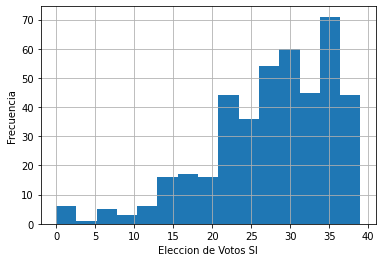

In [35]:
#De acuerdo a SI_NUM (Los datos de la columna "SI" convertida a int) instanciamos un grafico de histogramas.
SI_NUM.hist(bins=15) 
#Renombramos el titulo de la variable "X" a "Eleccion de Votos SI"
plt.xlabel("Eleccion de Votos SI")
#Renombramos el titulo de la variable "Y" a "Frecuencia"
plt.ylabel("Frecuencia")

**Interpretación**

> De acuerdo a lo observado, se puede apreciar que la mayor concentracion de *Votos SI*, que realizo cada persona por todo el conjunto de electores, se encuentran entre 25 y 35 votos. 

> Se puede visualizar que la menor frecuencia de votos "SI" se encuentra entre 3 y 5 aproximadamente.

> Se puede observar que la muestra esta distribuida desde 0 hasta a lo sumo 39 votos catalogados como "SI" aproximadamente.







####Barras

> Este tipo de representación es grafica un conjunto de valores mediante barras proporcionales a los valores representados, asi bien, es que hemos de determinar dicho grafico en base a las opciones de votación por los datos con valores "NO".

Text(0, 0.5, 'Frecuencia')

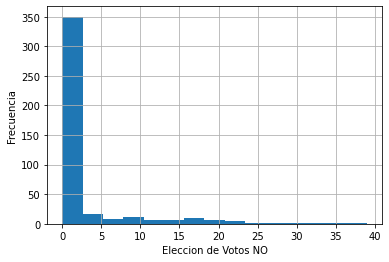

In [36]:
#De acuerdo a NO_NUM (Los datos de la columna "NO" convertida a int) instanciamos un grafico de histogramas.
NO_NUM.hist(bins=15) 
#Renombramos el titulo de la variable "X" a "Eleccion de Votos NO"
plt.xlabel("Eleccion de Votos NO")
#Renombramos el titulo de la variable "Y" a "Frecuencia"
plt.ylabel("Frecuencia")

**Interpretación**

> De acuerdo a lo observado, se puede apreciar que la mayor concentracion de *Votos NO*, que realizo cada persona por todo el conjunto de electores, se encuentran entre 0 y 5 votos. 

> Se puede visualizar que la menor frecuencia de votos "NO" se encuentra entre 25 y 40 aproximadamente.

> Se puede observar que la muestra esta distribuida desde 0 hasta a lo sumo 39 votos catalogados como "NO" aproximadamente.

####Circular

El grafico circular, es una representación estadística en donde nos mostrara ciertos porcentajes y proporciones, respecto a un conjunto de datos determinado. Por lo tanto, es que hemos decidido en visualizar en que tipo de etapa, es en la que generalmente se encuentran los temas planteados en las votaciones registradas, llegando a ciertas interpretaciones.

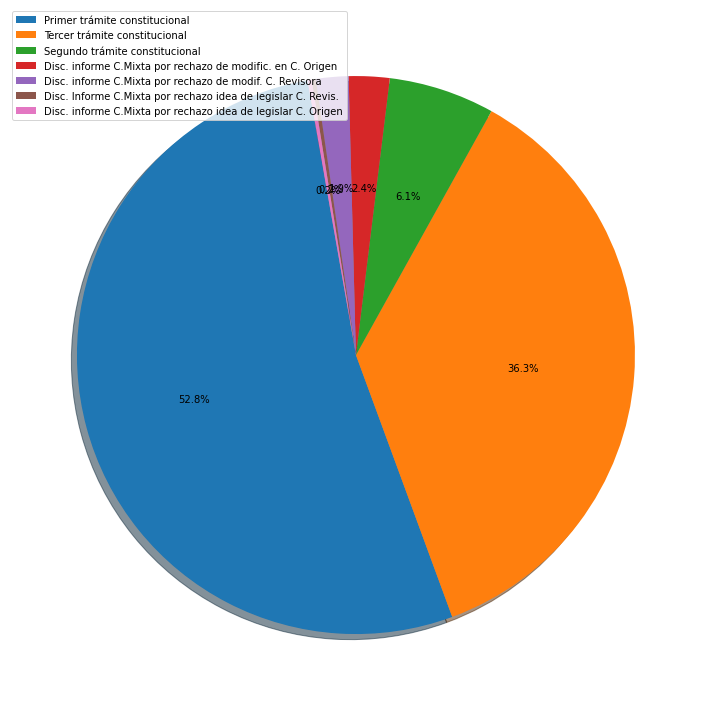

In [37]:
#Agregamos como un array los datos agrupados de la columna "ETAPA"
names = list(detvot_est['ETAPA'].unique())
#Generamos una agrupacion en base al "ETAPA" obteniendo el conteo de datos por cada dato de tal columna.
datSI = list(detvot_est['ETAPA'].value_counts())
#Creamos un grafico circular con los nombre y datos del Feature "ETAPA"
plt.figure(figsize=(12.5,22.2))
plt.pie(datSI,labels=None, autopct='%1.1f%%',shadow=True, startangle=100)
plt.legend(loc='upper left',labels=names)
plt.show()

**Interpretación**

> De acuerdo a lo examinado, se puede apreciar que a la gran frecuencia de Etapas, se encuentra catalogada como una etapa de "Primer Tramite Constitucional" en su gran mayoria.



####Dispersión

> Un grafico de dispersion o *burbujas* es un diagrama matemático, que nos permitira utilizar ciertas coordenadas cartesianas, para mostrar valores de dos variables para un cierto conjunto de datos.
> 
> En este caso, daremos por análizar e interpretar las votaciones con opciones "SI" y "NO", en donde nuestro objetivo se determinara en visualizar cual opcion fue mas utilizada en las votaciones.




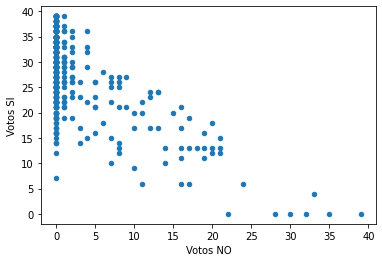

In [38]:
#utilizamos el metodo ".scatter" para realizar un grafico de dispersión y agregar los parametros en base a las variables que necesitemos usar ("SI" y "NO")
detvot_est.plot.scatter(y="SI", x="NO")
plt.xlabel("Votos NO")
plt.ylabel("Votos SI")
plt.show()

**Interpretación**

> Se puede examinar que mientras mas votos "SI" se van realizando, menos votos "NO" habran, determinando que no existe relacion entre las variables.



####Cajas

> Un diagrama de caja y/o bigotes, es un metodo el cual esta pensado para representar graficamente una serie de datos numericos, mostrando a simple vista medidas como; la mediana, cuartiles y por otro lado, valores atipicos.
> 
> En esta oportunidad se realizara la comparación de las circunstancias de las votaciones realizadas por cada tema de votación (valga la redundancia), con el fin de visualizar ciertos análisis sobre este aspecto.



In [39]:
detvot_est

,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,0,Primer trámite constitucional,2020-06-02,1,0,None,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular
...,...,...,...,...,...,...,...,...,...,...
420,4,Primer trámite constitucional,2020-09-01,0,0,None,79/368,33,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general
421,3,Segundo trámite constitucional,2020-09-08,0,0,Mayoría simple,84/368,35,"Aprobación, en general y particular, del proye...",Discusión general
422,4,Segundo trámite constitucional,2019-04-10,7,0,Mayoría simple,9/367,25,"Proyecto de ley, en segundo trámite constituci...",Discusión general
423,1,Segundo trámite constitucional,2019-06-11,4,0,Mayoría simple,24/367,33,"Proyecto de ley, en segundo trámite constituci...",Discusión particular


In [40]:
#Votos Totales por cada opcion de Votacion
Votacion = pd.DataFrame({detvot_est.columns[0] : detvot_est['ABSTENCION'].loc[:], detvot_est.columns[4] : detvot_est['NO'].loc[:], 
                         detvot_est.columns[5] : detvot_est['PAREO'].loc[:], detvot_est.columns[9] : detvot_est['SI'].loc[:],
                         detvot_est.columns[8] : detvot_est['TEMA'].loc[:], detvot_est.columns[5] : detvot_est['QUORUM'].loc[:]})
Votacion['TOTALVOTOS'] = Votacion.sum(axis=1)
Votacion[['TEMA','QUORUM','TOTALVOTOS']]

,TEMA,QUORUM,TOTALVOTOS
0,"Proyecto de ley, en primer trámite constitucio...",Mayoría simple,15
1,Aprobación en particular del proyecto de ley q...,None,38
2,"Proyecto de ley, en primer trámite constitucio...",Cuatro séptimos Q.C.,28
3,"Proyecto de ley, en primer trámite constitucio...",Mayoría simple,39
4,"Proyecto de ley, en primer trámite constitucio...",Cuatro séptimos Q.C.,35
...,...,...,...
420,"Proyecto de ley, iniciado en Moción de los Hon...",None,37
421,"Aprobación, en general y particular, del proye...",Mayoría simple,38
422,"Proyecto de ley, en segundo trámite constituci...",Mayoría simple,36
423,"Proyecto de ley, en segundo trámite constituci...",Mayoría simple,38


**Análisis**

> Visualizamos el total de votos respecto a cada tema propuesto en dichas votaciones, en base la circunstancia que predomino en dicha votación.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


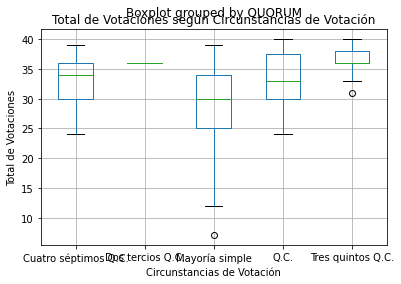

In [41]:
#Visualizamos una comparación entre las Circunstancias de las Votaciones respecto al Total de Votos por Cada Tema Planteado.
Votacion[Votacion.QUORUM.isin(['Mayoría simple', 'Cuatro séptimos Q.C.','Q.C.','Tres quintos Q.C.','Dos tercios Q.C.'])][['TOTALVOTOS', 'QUORUM']].boxplot(by='QUORUM')
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
plt.title('Total de Votaciones según Circunstancias de Votación')
plt.xlabel('Circunstancias de Votación')
plt.ylabel('Total de Votaciones')
plt.show()


**Interpretación**

> De acuerdo a tal comparación, es que la Circunstacia de Votación "Tres quintos Q.C" es la que presenta la menor cantidad sobre un gran conjunto de datos en comparación con las otras, en donde quién predomina con un gran conjunto de datos es la "Mayoria Simple".
> 
> Por otro lado, en las situaciones *Mayoria simple* y *Tres quintos Q.C* presentamos una poca cantidad de outliers de estos tipos de datos, lo que nos puede indicar, que gran parte de los datos se encuentran dentro del conjunto de datos o bien dentro de l cantidad de datos que predomina en estos tipos de circunstancias.
> 
> También se puede examinar, que el conjunto de votos de la situación "Tres quintos Q.C." se encuentra desde 33 hasta 40 votos aproximadamente.






####Parejas/Pairplot

> Una buena forma de representar una relación cruzada entre todas las variables de un conjunto de datos es un grafico de "Parejas" o Pairplot, dado que es una representación estdistica sofisticada la cual puede ser encontrada en el paquete o libreria de Seaborn, esque importaremos dicha libreria, para comenzar con la representación de esto.





In [42]:
#Importando la librearía seaborn para analizar los siguientes gráficos
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

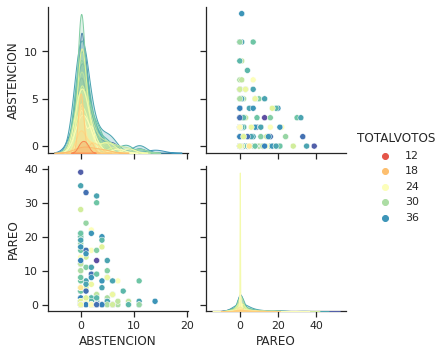

In [43]:
#Votos Totales por cada opción de Votación gráfica pairplot
NuevoVotacion=Votacion [['TOTALVOTOS','ABSTENCION','PAREO','TEMA','QUORUM']]
sns.set(style='ticks',color_codes=True)
g=sns.pairplot(NuevoVotacion,hue='TOTALVOTOS',palette='Spectral')
plt.show()

**Interpretación**

> Visualizamos un análisis de relación que puede haber entre las variables "Pareo" y "Abstención" que se presentan a través de una gráfica pairplot visualizando el total de votos respecto a cada tema propuesto en dichas votaciones, es una manera más fácil de visualizar los votos.


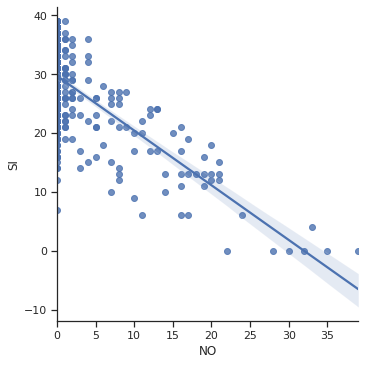

In [44]:
#utilizamos el metodo ".lmplot" para realizar un grafico de dispersión con las variables ("SI" y "NO") 
g=sns.lmplot(x='NO',y='SI',data=detvot_est,palette='Set1')

**Interpretación**

> La primera relación que se visualiza es una relación lineal donde mostramos los datos dentro de una correlación lineal y como vimos anteriormente mientras más votos "SI" se van realizando, menos votos "NO" habrán, determinando que no existe relación entre las variables.

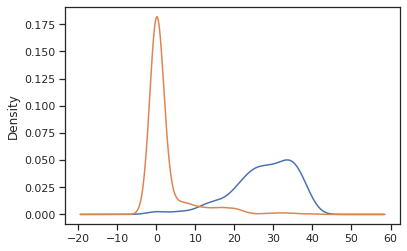

In [45]:
#Utilizamos el metodo ".plot.dendisyt" para rvisualizar la densidad con las variables ("SI" y "NO") 
detvot_est.SI.plot.density()
detvot_est.NO.plot.density()

**Interpretación**

> Está relacionada con la probabilidad de que el voto SI y NO estén en su punto máximo y cuando estén en su punto de inflexión en los periodos de votación.

#Fase 3 - Preparación de la Data

> Durante toda la epoca de la mineria de datos, o bien en su gran mayoria, obtenemos un DataSet en donde se pueden presentar datos que frecuentemente no estan limpios, puede que le falten valores claves, o bien contengan inconsistencias, causando errores y valores atípicos, es por esto, que un paso preliminar durante el proceso de Mineria de Datos es realizar esta prepacion de la "data" en donde procesos como el preprocesamiento, transformación, escalamiento, entre otros, son fundamentales para cumplir el objetivo de esta fase.
>
> Cabe recalcar, que si bien este proyecto apunta al area de Machine Learning, Mineria de Datos es un "proceso" que ocurre antes, por lo tanto, estan directamente conectados para obtener el mejor resultado posible con los datos, ganando conocimiento en base a información relevante para la compañia u organización.

###Tratamiento de Valores NaN/Nulls/None

> Asi bien, procederemos a realizar el tratamiento de valores NaN, en donde comenzaremos por repasar los nulls encontrados en el data DataFrame *detalleVoto*, y posteriormente con el analisis y tratamientos de estos tipos de valores "perdidos".




In [46]:
#Buscamos los datos NaN y los agrupamos en una matriz, mostrandonos solamente si esque existe aunque sea un solo NaN en todo el DataFrame
detvot_est.isna().any().any()

True

**Análisis**

> De acuerdo a dicho resultado, se concluye y confirma que en *detalleVoto*, encontramos valores NaN.





>En análisis anteriores se demostro, con evidencia clara la existencia de valores NaN, por lo cual comenzaremos con el tratamiento de estos. Consecuentemente, dividiremos este proceso en dos partes, una en donde se trate de realizar enfocadamente en el DataFrame `votos`, y otra parte en donde nos relacionaremos con el Data Set `detalleVoto`, esto con el fin de dejar la data, de la forma mas "limpia" posible de estos valores. Por lo tanto, esque comenzaremos con el Data Set `votos`.


In [47]:
# Transferimos el Data Frame "votos" a una variable, donde esta sera ocupada en tratamientos y transformaciones.
vo_votos = votos
vo_votos

,"Latorre R., Juan Ignacio","Coloma C., Juan Antonio","García R., José","Bianchi C., Carlos","Navarro B., Alejandro","Allende B., Isabel","Lagos W., Ricardo","García Huidobro S., Alejandro","Guillier Á., Alejandro","Durana S., José Miguel","Prohens E., Rafael","Pugh O., Kenneth","Elizalde S., Alvaro","Galilea V., Rodrigo","Huenchumilla J., Francisco","Sandoval P., David","Pizarro S., Jorge","Girardi L., Guido","Letelier M., Juan Pablo","Pérez V., Víctor","Chahuán C., Francisco","Quintana L., Jaime","Rincón G., Ximena","Von Baer J., Ena","Araya G., Pedro","Van Rysselberghe H., Jacqueline","Goic B., Carolina","Harboe B., Felipe","De Urresti L., Alfonso","Quinteros L., Rabindranath","Moreira B., Iván","Muñoz D., Adriana","Ossandón I., Manuel José","Insulza S., José Miguel","Ebensperger O., Luz Eliana","Soria Q., Jorge","Provoste C., Yasna","Castro P., Juan","Aravena A., Carmen Gloria","Kast S., Felipe","Órdenes N., Ximena","Allamand Z., Andrés","Montes C., Carlos","Alvarado A., Claudio","Sabat F., Marcela"
0,Si,Si,Si,Si,Si,Si,Si,Si,Pareo,Si,Si,Si,Si,Si,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,NaN,Si,Si,Si,Si,NaN,NaN,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,NaN,NaN,NaN
2,Si,Si,Si,Si,NaN,Si,Si,Si,Si,NaN,Si,NaN,Si,Pareo,Si,Si,Si,Si,Si,NaN,Si,Si,NaN,Si,NaN,Abstencion,NaN,NaN,Si,Si,NaN,NaN,Si,NaN,Si,Si,NaN,NaN,Si,Si,NaN,Si,Si,NaN,NaN
3,Si,Si,Si,Si,Si,NaN,NaN,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,NaN,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,NaN
4,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,Si,Si,Si,Si,Si,Si,NaN,Si,Si,Si,NaN,Si,NaN,NaN,NaN,Si,Si,Si,NaN,Si,Si,Si,NaN,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,NaN,Si,Si,Si,Si,Si,NaN,Si,Si,Si,Abstencion,NaN,NaN,Si,NaN,Si,Si,NaN,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,NaN,NaN,Abstencion,Si
421,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,Si,NaN,Si,Si,Si,NaN,NaN,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,Si,Si,Si,NaN,NaN,NaN,Si
422,No,Si,Si,Abstencion,NaN,No,No,NaN,No,Si,Si,Si,No,Si,NaN,Si,Si,NaN,NaN,Si,Si,NaN,Si,Si,No,Si,Si,Si,No,Si,Si,Si,Si,Si,Si,NaN,Abstencion,Si,Si,Si,Abstencion,Si,Abstencion,NaN,NaN
423,Abstencion,Si,Si,No,No,Si,Si,Si,Si,Si,Si,Si,No,Si,Si,Si,Si,NaN,Si,NaN,Si,Si,Si,Si,Si,Si,Si,NaN,No,Si,Si,Si,Si,Si,Si,Si,Si,Si,NaN,Si,Si,Si,NaN,NaN,NaN


>Tenemos presente un Data Set (*votos*) el cual presenta una gran cantidad de Columnas, por lo tanto, tenemos la opción de ir creando nuevas columnas en donde estas seran la representación de cada Feature, pero sin valores NaN (lo cual generaria muchas columnas en un Data Set y podria provocar en no generar una manera optimizada de visualizar los datos), o bien podriamos realizar un nuevo DataFrame en donde encontraremos todas las columnas de votos pero sin valores NaN, consiguiendo un DataFrame mas limpio y preparado para su tratamiento y uso en análisis posteriores. 
>
>Es entonces que debido a lo mencionado anteriormente, optaremos por la segunda alternativa para la Data de `votos`.

In [92]:
# Creamos un Data Frame Vacio, sin datos.
new_votos = pd.DataFrame()
new_votos

""


In [49]:
#Recorremos cada columna del Data Set vo_votos y reemplazamos por la moda, de acuerdo a los valores de cada columna.
for feature in vo_votos.columns:
  imp = sim(strategy='most_frequent', missing_values=np.nan)
  imp.fit(vo_votos[[feature]])
  new_votos[[feature]] = imp.transform(vo_votos[[feature]])

In [50]:
#Luego del anterior proceso, este es guardado en el Data Frame "new_votos", como se visualiza.
new_votos

,"Latorre R., Juan Ignacio","Coloma C., Juan Antonio","García R., José","Bianchi C., Carlos","Navarro B., Alejandro","Allende B., Isabel","Lagos W., Ricardo","García Huidobro S., Alejandro","Guillier Á., Alejandro","Durana S., José Miguel","Prohens E., Rafael","Pugh O., Kenneth","Elizalde S., Alvaro","Galilea V., Rodrigo","Huenchumilla J., Francisco","Sandoval P., David","Pizarro S., Jorge","Girardi L., Guido","Letelier M., Juan Pablo","Pérez V., Víctor","Chahuán C., Francisco","Quintana L., Jaime","Rincón G., Ximena","Von Baer J., Ena","Araya G., Pedro","Van Rysselberghe H., Jacqueline","Goic B., Carolina","Harboe B., Felipe","De Urresti L., Alfonso","Quinteros L., Rabindranath","Moreira B., Iván","Muñoz D., Adriana","Ossandón I., Manuel José","Insulza S., José Miguel","Ebensperger O., Luz Eliana","Soria Q., Jorge","Provoste C., Yasna","Castro P., Juan","Aravena A., Carmen Gloria","Kast S., Felipe","Órdenes N., Ximena","Allamand Z., Andrés","Montes C., Carlos","Alvarado A., Claudio","Sabat F., Marcela"
0,Si,Si,Si,Si,Si,Si,Si,Si,Pareo,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si
1,No,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si
2,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Pareo,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si
3,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si
4,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si
420,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,Si,Si,Si,Si,Si,Si,Si
421,No,Si,Si,Abstencion,Si,No,No,Si,No,Si,Si,Si,No,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,No,Si,Si,Si,No,Si,Si,Si,Si,Si,Si,Si,Abstencion,Si,Si,Si,Abstencion,Si,Abstencion,Si,Si
422,Abstencion,Si,Si,No,No,Si,Si,Si,Si,Si,Si,Si,No,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,No,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si


**Explicación**

> Por consiguiente a lo hecho anteriormente, esque se tendra que explicar el por qué de realizar tal proceso de tratamiento de valores NaN, por cada columna del Data Set `votos` de forma automatizada, y es que esta determinación fue elegida por el siguiente pensamiento analitico.
>
> Si recordamos bien el dicho Data Frame, el cual se conforma porque cada columna es un senador, y en donde las filas o datos de estas columnas son solo valores especificos como "Si", "No", "Abstencion", entre otros, nos daremos cuenta que una columna no difiere de la otra en la forma de generar diversidad de datos entregados. Por lo tanto, visto desde un punto de vista análitico, en donde queramos obtener una informacion sobre otro aspecto de la data, como por ejemplo, una columna sobre información del lugar en que se gestiono esa votación, no la obtendremos en esta ocación. Por consiguiente, si bien en parte tampoco no esta mal el no incluir esta informacion en la *data*, ya que este tipo de info iria mas destinada al Data Set `detalleVoto`, por lo tanto, quiero concluir dicha explicación con que este fue el punto fuerte de tomar dicha decición y no realizar dicho tratamiento de valores NaN, de forma individual por cada columna análizando casi practicamente algo parecido entre el por qué se tomo dicha forma de tratamiento para esta columna.
>
> Por otra parte, se determino utilizar una estrategia enfocada a la mayor frecuencia de valores de datos encontrados por columna, por el hecho de realizar un entendimiento en que en una votación si un candidato obtiene una cantidad de votos, por lo general se puede dejarse a llevar por las ideas de otros senadores, en donde posiblemente tengan un pensamiento parecido o bien alguna relación, lo cual causaria como resultado el aumento del valor mas frecuente. 










> Continuaremos con el Data Set `detalleVoto`, en donde este desarrollo sera de una forma muy distinta ya que implementaremos este tratamiento de forma independiente para cada columna, y es que en este caso obtendremos *Features* mucho mas diversos que en la propia data como tal, por simple hecho de tratarse de ser una *metadata*, la cual esta enfocada en los detalles de la data misma.
>
> Por otro lado, como bien sabemos (gracias a anteriores exploraciones) este DataFrame `detalleVoto` cuenta con solo 3 columnas con valores NaN, por lo tanto es una gran cantidad menor en comparación con el DataFrame `votos`. Es por esto, que iremos almacenando dichas columnas con valores tratados en una nueva columna, integrada en el mismo Data Set `detalleVoto`, en donde por consiguiente obtendremos una lectura mucho mas legible nuevamente en comparación con el Data Set `votos`.


In [99]:
#Transferimos la metadata a una variable distinta a la utilizada, para evitar cambios en tal variable.
new_detvotos = detvot_est
new_detvotos

,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,QUORUM2,TEMA2,TIPOVOTACION2
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Mayoría simple,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,0,Primer trámite constitucional,2020-06-02,1,0,None,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general,Mayoría simple,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Cuatro séptimos Q.C.,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Mayoría simple,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular,Cuatro séptimos Q.C.,"Proyecto de ley, en primer trámite constitucio...",Discusión particular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,4,Primer trámite constitucional,2020-09-01,0,0,None,79/368,33,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general,Mayoría simple,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general
421,3,Segundo trámite constitucional,2020-09-08,0,0,Mayoría simple,84/368,35,"Aprobación, en general y particular, del proye...",Discusión general,Mayoría simple,"Aprobación, en general y particular, del proye...",Discusión general
422,4,Segundo trámite constitucional,2019-04-10,7,0,Mayoría simple,9/367,25,"Proyecto de ley, en segundo trámite constituci...",Discusión general,Mayoría simple,"Proyecto de ley, en segundo trámite constituci...",Discusión general
423,1,Segundo trámite constitucional,2019-06-11,4,0,Mayoría simple,24/367,33,"Proyecto de ley, en segundo trámite constituci...",Discusión particular,Mayoría simple,"Proyecto de ley, en segundo trámite constituci...",Discusión particular



> Antes de proseguir, ya que según investigamos y confirmamos, me gustaria destacar un punto bastante relevante en esta proxima transformacion y/o reemplazo de valores *NaN* o de *Tipo None*, en donde en esta oportunidad utilizaremos un metodo llamado `Fillna`, el cual permite llenar cada valor NaN o None con algun dato que nosotros estimemos pertinente, en donde por otro lado, el algoritmo Simple Imputer (operacion anteriormente utilizada debido a los tipos de datos NaN) no permite instancias de tipo None, ya que de otra forma nos dara un error mencionandonos lo siguiente.  
`'<' not supported between instances of 'NoneType' and 'str'`
>
> Asi bien, dejamos en claro, el por qué de dicho cambio de metodo o forma de tratamiento de valores "null".




In [52]:
#QUORUM 
#Transformamos los valores NaN, con datos referentes al valor mas frecuente, con el metodo Fillna. 
moda = new_detvotos['QUORUM'].mode()[0]
new_detvotos['QUORUM2'] = new_detvotos['QUORUM'].fillna(moda)

**Análisis**
> Se puede observar (debido al codigo), que la caracteristica *QUORUM* al ser una variable categorica nuestras opciones se catalogaban en reemplazar por:
>*  La Moda
*   Un valor Categorico Personalizado                                         
>
> Es por estas elecciones, que la que mejor podria adaptarse a obtener un valor mas cercano a lo que requieren mostrar estos tipos de datos en dicha *Feature*, es por la moda, la cual podria mencionar debido a la frecuencia de los demas datos en dicha columna que valor seria el mas adecuado, ajustandose a probables sesiones de otras votaciónes las cuales también llegarón a ser de tal tipo valor.




In [100]:
#TEMA 
#Transformamos los valores NaN, con un dato personalizado referente a los valores de la columna, con el metodo Fillna. 
new_detvotos['TEMA2'] = new_detvotos['TEMA'].fillna('Proyecto de Ley (Sin Mas Descripcion)')

**Análisis**

> Se puede observar (debido al codigo), que la caracteristica *TEMA* al ser una variable categorica con casi ningún valor repetido en sus datos, obteniamos anteriormente opciones se catalogaban en reemplazar por:
>*  La Moda
*   Un valor Categorico Personalizado                                         
>
> Es por estas elecciones, que la que mejor podria adaptarse a obtener un valor mas cercano a lo que requieren mostrar estos tipos de datos en dicha *Feature*, es por un valor personalizado, ya que anteriormente revisando en dichos datos, de dio a conocer que bien poseia muy pocos datos frecuentes o finalmente no habaían tales datos, lo cual nos dejaba con una columna con datos amodal (o sin moda), por otro lado, el reemplazar con una constante principalmente no se dio como opción ya que según lo sabido, con tal metodo "fillna" no es posible realizar tal operación y menos con el algoritmo SimpleImputer (por razones anteriormente mencionadas), por lo cual nos deja en que se debio por utilizar tal opción de tratamiento de valores NaN/None.

In [54]:
#TIPOVOTACION 
#Transformamos los valores NaN, con datos referentes al valor mas frecuente, con el metodo Fillna. 
moda = new_detvotos['TIPOVOTACION'].mode()[0]
new_detvotos['TIPOVOTACION2'] = new_detvotos['TIPOVOTACION'].fillna(moda)

**Análisis**

> Se puede observar (debido al codigo), que la caracteristica *TIPOVOTACION* al ser una variable categorica nuestras opciones se catalogaban, de igual forma que las anteriores opciones, en reemplazar por:
>*  La Moda
*   Un valor Categorico Personalizado                                         
>
> Es por estas elecciones, que la que mejor podria adaptarse a obtener un valor mas cercano a lo que requieren mostrar estos tipos de datos en dicha *Feature*, es por la moda, la cual podria mencionar debido a la frecuencia de los demas datos en dicha columna que valor seria el mas adecuado, esto principalmente ya que en esta ocación si podriamos encontrar datos frecuentes por la minima razón de ser una forma de realizar las cosas, en donde en 424 filas aprox. podria llegar a haber una moda.

In [55]:
for feature in new_detvotos.columns:
  print('Total de valores NaN/None de', feature, '=', new_detvotos[feature].isna().sum())

Total de valores NaN/None de ABSTENCION = 0
Total de valores NaN/None de ETAPA = 0
Total de valores NaN/None de FECHA = 0
Total de valores NaN/None de NO = 0
Total de valores NaN/None de PAREO = 0
Total de valores NaN/None de QUORUM = 11
Total de valores NaN/None de SESION = 0
Total de valores NaN/None de SI = 0
Total de valores NaN/None de TEMA = 1
Total de valores NaN/None de TIPOVOTACION = 3
Total de valores NaN/None de QUORUM2 = 0
Total de valores NaN/None de TEMA2 = 0
Total de valores NaN/None de TIPOVOTACION2 = 0


**Análisis**

> Se pueden observar las 3 columnas agregadas al Data Set, las cuales serian nombradas como QUORUM2, TEMA2, TIPOVOTACION2. Estas no presentan ningun valor NaN o None, permitiendonos proseguir con nuestro prepocesamiento de datos.

### Transformacion de Datos

> Actualmente contamos con la información en donde sabemos que los Data Set *votos*, *detalleVoto* y cualquiera, pueden presentar ciertas características de las cuales se traten de datos numéricos o categóricos. Así bien, para algunos algoritmos de Machine Learning y de entrenamiento de los datos, requieren que las columnas con las cuales se necesite trabajar deban ser numéricas, es por esto, que este proceso lo denominamos Transformación de los Datos.
>
> Por lo tanto, debido a este proceso que debemos comenzar, ya sea tanto por obtener una mejor distribución o análisis de los datos, es que hemos seleccionado nuevamente el DataFrame *detalleVotos*, con el fin de aprovechar en posteriores predicciones ciertas características que podrían servir para catalogar dicho DataSet, con un posible aprendizaje supervisado.




#### Modificación de Variables Categoricas

> En esta sección procederemos a tratar las variables categóricas y a revisarlas, seleccionando la mejor opción o enfoque posible, de acuerdo a ciertos argumentos que mencionaremos.
>
> En este proceso, tendremos 3 enfoques conocidos:
> *   Borrar las Variables Categóricas
> *   Label Encoder
> *   One-Hot-Encoder
>
> Para determinar que opción podría ser la más indicada para nuestro dataset, es que hemos decidido por comenzar con el método llamado "Label Encoder", el cual si se quiere obtener una razón más por la cual ocupar tal forma de transformación en un principio, es que podríamos basarnos en la idea (de la cual se investigó y aprendió en el curso) de que dicho Label Encoder podría ser utilizado para cuando ocurren correlaciones entre los "Features", y por otro lado One-Hot-Encoder podría ser utilizado para cuando no exista o bien se encuentren con muy poca correlación entre las columnas, si bien dicha mención no es algo de lo que se pueda confiar en un 100%, es una base de la cual nos sostendremos para comenzar este proceso. 
>
> Es por esto, es que hemos decidido por recurrir a utilizar el Label Encoder como de comienzo, ya que como bien se podrá mencionar en otros aspectos del trabajo, podrá ser otro cambio a integrar en una futura iteración, en donde se pueda probar si aplicar un One-Hot-Encoder podríamos obtener mejores resultados en posteriores Modelos de Predicción integrados a este mismo trabajo, así bien por el momento mantenemos la idea de que esta decisión nos llevara a obtener un mejor rendimiento, por lo menos por ahora en donde aún no es aplicado tal forma de transformación binaria.




In [56]:
#Visualizamos la metadata en su nueva variable.
new_detvotos

,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,QUORUM2,TEMA2,TIPOVOTACION2
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Mayoría simple,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,0,Primer trámite constitucional,2020-06-02,1,0,None,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general,Mayoría simple,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Cuatro séptimos Q.C.,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Mayoría simple,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular,Cuatro séptimos Q.C.,"Proyecto de ley, en primer trámite constitucio...",Discusión particular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,4,Primer trámite constitucional,2020-09-01,0,0,None,79/368,33,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general,Mayoría simple,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general
421,3,Segundo trámite constitucional,2020-09-08,0,0,Mayoría simple,84/368,35,"Aprobación, en general y particular, del proye...",Discusión general,Mayoría simple,"Aprobación, en general y particular, del proye...",Discusión general
422,4,Segundo trámite constitucional,2019-04-10,7,0,Mayoría simple,9/367,25,"Proyecto de ley, en segundo trámite constituci...",Discusión general,Mayoría simple,"Proyecto de ley, en segundo trámite constituci...",Discusión general
423,1,Segundo trámite constitucional,2019-06-11,4,0,Mayoría simple,24/367,33,"Proyecto de ley, en segundo trámite constituci...",Discusión particular,Mayoría simple,"Proyecto de ley, en segundo trámite constituci...",Discusión particular


**Análisis**

>Se puede apreciar el DataFrame "detalleVotos" en esta nueva variable, pero con la integración de las columnas que esta vez, no presentaran valores NaN.


In [57]:
new_detvotos

,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,QUORUM2,TEMA2,TIPOVOTACION2
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Mayoría simple,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,0,Primer trámite constitucional,2020-06-02,1,0,None,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general,Mayoría simple,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Cuatro séptimos Q.C.,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Mayoría simple,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular,Cuatro séptimos Q.C.,"Proyecto de ley, en primer trámite constitucio...",Discusión particular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,4,Primer trámite constitucional,2020-09-01,0,0,None,79/368,33,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general,Mayoría simple,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general
421,3,Segundo trámite constitucional,2020-09-08,0,0,Mayoría simple,84/368,35,"Aprobación, en general y particular, del proye...",Discusión general,Mayoría simple,"Aprobación, en general y particular, del proye...",Discusión general
422,4,Segundo trámite constitucional,2019-04-10,7,0,Mayoría simple,9/367,25,"Proyecto de ley, en segundo trámite constituci...",Discusión general,Mayoría simple,"Proyecto de ley, en segundo trámite constituci...",Discusión general
423,1,Segundo trámite constitucional,2019-06-11,4,0,Mayoría simple,24/367,33,"Proyecto de ley, en segundo trámite constituci...",Discusión particular,Mayoría simple,"Proyecto de ley, en segundo trámite constituci...",Discusión particular


In [58]:
#Realizamos el proceso de transformación de variables categóricas segun sean elegidas, e integramos la fecha al nuevo DataFrame para organizar los datos.
label_encoder = le()
QR = new_detvotos['QUORUM2']
ET = new_detvotos['ETAPA']
TP = new_detvotos['TIPOVOTACION2']
FC = new_detvotos['FECHA']
SS = new_detvotos['SESION']
TM = new_detvotos['TEMA2']

integer_encoded = label_encoder.fit_transform(QR)
integer_encoded2 = label_encoder.fit_transform(ET)
integer_encoded3 = label_encoder.fit_transform(TP)
FC_num = label_encoder.fit_transform(FC)
SS_num = label_encoder.fit_transform(SS)
TM_num = label_encoder.fit_transform(TM)
detVotNum = pd.DataFrame({ new_detvotos.columns [2] : new_detvotos['FECHA'], 'FECHA_NUM': FC_num, 
                          'ETAPA_NUM' : integer_encoded2,'QUORUM_NUM' : integer_encoded, 
                          'SESION_NUM': SS_num, 'TEMA_NUM': TM_num
                          ,'TIPOVOTACION_NUM' : integer_encoded3})
detVotNum

,FECHA,FECHA_NUM,ETAPA_NUM,QUORUM_NUM,SESION_NUM,TEMA_NUM,TIPOVOTACION_NUM
0,2018-12-12,52,4,2,145,155,0
1,2020-06-02,148,4,2,65,58,0
2,2019-12-30,122,4,0,164,205,0
3,2019-03-05,60,4,2,178,156,0
4,2020-01-29,133,4,0,9,157,2
...,...,...,...,...,...,...,...
420,2020-09-01,162,4,2,150,396,0
421,2020-09-08,163,5,2,157,64,0
422,2019-04-10,69,5,2,167,258,0
423,2019-06-11,81,5,2,48,259,2


**Análisis**

> De acuerdo al DataFrame creado, se obtiene una forma distinta de almacenar dichas variables categóricas en numéricas, para detallar una mejor visión del resultado de este desarrollo.




In [59]:
new_detvotos.iloc[:]

,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,QUORUM2,TEMA2,TIPOVOTACION2
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Mayoría simple,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,0,Primer trámite constitucional,2020-06-02,1,0,None,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general,Mayoría simple,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Cuatro séptimos Q.C.,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Mayoría simple,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular,Cuatro séptimos Q.C.,"Proyecto de ley, en primer trámite constitucio...",Discusión particular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,4,Primer trámite constitucional,2020-09-01,0,0,None,79/368,33,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general,Mayoría simple,"Proyecto de ley, iniciado en Moción de los Hon...",Discusión general
421,3,Segundo trámite constitucional,2020-09-08,0,0,Mayoría simple,84/368,35,"Aprobación, en general y particular, del proye...",Discusión general,Mayoría simple,"Aprobación, en general y particular, del proye...",Discusión general
422,4,Segundo trámite constitucional,2019-04-10,7,0,Mayoría simple,9/367,25,"Proyecto de ley, en segundo trámite constituci...",Discusión general,Mayoría simple,"Proyecto de ley, en segundo trámite constituci...",Discusión general
423,1,Segundo trámite constitucional,2019-06-11,4,0,Mayoría simple,24/367,33,"Proyecto de ley, en segundo trámite constituci...",Discusión particular,Mayoría simple,"Proyecto de ley, en segundo trámite constituci...",Discusión particular


In [101]:
#Implementamos las columnas ETAPA_NUM, QUORUM_NUM y TIPOVOTACION_NUM al DataSet que se ocupara en adelante. 
a1 = new_detvotos.iloc[:]
b1 = detVotNum.iloc[:]
columns_v = a1[['ABSTENCION','NO','PAREO','SI']].astype({'ABSTENCION': object,'NO': object,'PAREO': object,'SI': object})
dc = {'ID' : list(range(0,columns_v.index.max())) , a1.columns[0] : a1['ABSTENCION'], a1.columns [1] : a1['ETAPA'], b1.columns[2] : b1['ETAPA_NUM'], a1.columns [2] : a1['FECHA'], 
      b1.columns[1] : b1['FECHA_NUM'], a1.columns[3] : a1['NO'], a1.columns[4] : a1['PAREO'], a1.columns[10] : a1['QUORUM2'],
      b1.columns[3] : b1['QUORUM_NUM'], a1.columns[6] : a1['SESION'], b1.columns[4] : b1['SESION_NUM'], a1.columns[7] : a1['SI'] ,
      a1.columns[11] : a1['TEMA2'], b1.columns[5] : b1['TEMA_NUM'], a1.columns[12] : a1['TIPOVOTACION'], b1.columns[6] : b1['TIPOVOTACION_NUM'],
      'TOTALVOTOS' : a1[['ABSTENCION','NO','PAREO','SI']].sum(axis=1)}

'''
table = pd.DataFrame(dc)
columns_v2 = columns_v.join(table['ID'])

for id in columns_v2['ID']:
  row = pd.DataFrame(columns_v2[columns_v2.ID == id].drop('ID', axis=1))
  num_max = columns_v2[columns_v2.ID == id].drop('ID', axis=1).max(axis=1).values[0]
  for cl in row.columns:
    if (row[cl].values[0] == num_max):
      dc['VOTOGANADOR'] = cl
'''


detVotEnd = pd.DataFrame(dc)
detVotEnd.head(340)

,ID,ABSTENCION,ETAPA,ETAPA_NUM,FECHA,FECHA_NUM,NO,PAREO,QUORUM2,QUORUM_NUM,SESION,SESION_NUM,SI,TEMA2,TEMA_NUM,TIPOVOTACION2,TIPOVOTACION_NUM,TOTALVOTOS
0,0,0,Primer trámite constitucional,4,2018-12-12,52,0,1,Mayoría simple,2,77/366,145,15,"Proyecto de ley, en primer trámite constitucio...",155,Discusión general,0,16
1,1,0,Primer trámite constitucional,4,2020-06-02,148,1,0,Mayoría simple,2,31/368,65,37,Aprobación en particular del proyecto de ley q...,58,Discusión general,0,38
2,2,1,Primer trámite constitucional,4,2019-12-30,122,0,1,Cuatro séptimos Q.C.,0,89/367,164,27,"Proyecto de ley, en primer trámite constitucio...",205,Discusión general,0,29
3,3,0,Primer trámite constitucional,4,2019-03-05,60,0,0,Mayoría simple,2,94/366,178,39,"Proyecto de ley, en primer trámite constitucio...",156,Discusión general,0,39
4,4,0,Primer trámite constitucional,4,2020-01-29,133,0,0,Cuatro séptimos Q.C.,0,103/367,9,35,"Proyecto de ley, en primer trámite constitucio...",157,Discusión particular,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,335,0,Primer trámite constitucional,4,2019-03-20,65,0,0,Mayoría simple,2,4/367,80,16,"Proyecto de ley, en primer trámite constitucio...",197,Discusión particular,2,16
336,336,6,Segundo trámite constitucional,5,2020-08-27,161,7,0,Mayoría simple,2,77/368,147,22,"Aprobación, en general, del proyecto de ley qu...",68,Discusión general,0,35
337,337,0,Segundo trámite constitucional,5,2020-09-15,164,0,3,Mayoría simple,2,89/368,165,30,Aprobación de los artículo 1° y 2° del proyect...,10,Discusión particular,2,33
338,338,3,Segundo trámite constitucional,5,2020-09-15,164,9,0,Cuatro séptimos Q.C.,0,89/368,165,21,"Rechazo del artículo 3° del proyecto de ley, e...",412,Discusión particular,2,33


**Análisis**

> Se visibiliza el nuevo DataFrame el cual está compuesto tanto por datos "reales" (sin valores none o nan), como de variables categóricas a numéricas, obteniendo un DataFrame el cual podemos catalogar como *Limpio* para siguientes análisis.
>
>Así bien, se quiere mencionar que se ha descubierto una inconsistencia entre los índices del mismo dataset, en donde mediante ciertos procesos, para llegar a obtener una mejor etiqueta de predicción para los Modelos de Predicción (valga la redundancia), se supo que entre los índices (o índex) 338 y 340, no existe el mismo índex 339, para lo cual se decidió optar por crear una columna que asignara *IDs* a cada fila, con el fin de obtener al final un buen conteo de cada fila propuesta por el dataset, si bien existen otros métodos para poder solucionar un problema como este, es que de acuerdo a nuestro equipo de trabajo hemos tomado tal decisión, principalmente por tal problema, ya que a futuro podría generar problemas de selección de filas para un mayor procesamiento de la data.



##Escalar Caracteristicas

> Con el objetivo de obtener un mejor funcionamiento de las variables de entrada en los algoritmos de Machine Learning, es que será aplicado la normalización de tales variables. Sin embargo se debe tener claro que realizar una mala aplicación de la normalización podría llegar a arruinar los datos y con el mismo nuestro análisis, es por esto, que para definir si tal proceso dio "frutos" positivos en nuestra fase de modelamiento, esta pregunta será respondida en la posterior conclusión de la misma fase cuatro de este trabajo.
>
>Por consecuente a no saber cuál forma de escalar sería la más optima, es que en un principio se utilizara el método MinMaxScaler, el cual mediante los datos comprimidos en el mínimo y máximo de cada Feature, lograra limitarlo de forma empírico.
>
>Así bien, comenzaremos por obtener solamente el Dataset enfocado a ser de tipo numérico, para posteriormente aplicar la normalización, ya que este mismo el Dataset debe ser numérico.


In [61]:
#Agrupación de columnas por tipo de dato
dataType = detVotEnd.columns.to_series().groupby(detVotEnd.dtypes).groups
#Se obtienen solo las columnas de tipo objeto
typeObj = dataType[np.dtype('object')]
#Se obtienen las columnas en un arrays
columns = detVotEnd.drop({'FECHA','ID'}, axis=1).columns
detVot_Num = pd.DataFrame(data=detVotEnd, columns=list(set(columns) - set(typeObj)))
detVot_Num.head()

,FECHA_NUM,TEMA_NUM,NO,ABSTENCION,SESION_NUM,TOTALVOTOS,PAREO,TIPOVOTACION_NUM,QUORUM_NUM,SI,ETAPA_NUM
0,52,155,0,0,145,16,1,0,2,15,4
1,148,58,1,0,65,38,0,0,2,37,4
2,122,205,0,1,164,29,1,0,0,27,4
3,60,156,0,0,178,39,0,0,2,39,4
4,133,157,0,0,9,35,0,2,0,35,4


**Análisis**
>Se puede visualizar la data enfocada a visualizar solamente datos numéricos, con detalles en el código como por ejemplo, eliminar las columnas "FECHA" y "ID", las cuales por un lado el "ID" al ser simplemente un numero correlativo que estará determinado en la cantidad de filas del Dataset (ya que el data presenta un error en un "escritura" sobre los índex, faltando la fila 339 si no mal me equivoco), esta no debería tener mayor impacto en los siguientes resultados en la Fase 4, así bien, "FECHA" al ser un tipo de dato "date time" no podría agregar impacto como tal, es por esto, que solamente se le ha dejado pero como un columna convertida a datos numérico.


In [62]:
#Se visualiza las probables anormalidades obtenidas en los cuartiles de cada Feature
detVot_Num.describe()

,FECHA_NUM,TEMA_NUM,NO,ABSTENCION,SESION_NUM,TOTALVOTOS,PAREO,TIPOVOTACION_NUM,QUORUM_NUM,SI,ETAPA_NUM
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,84.271226,211.025943,2.365566,1.066038,92.431604,31.134434,0.205189,0.771226,1.653302,27.497642,4.530660
std,49.284714,121.916655,5.928721,2.077773,54.318560,5.742162,0.503295,1.052756,0.947855,8.116177,0.906506
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.750000,105.750000,0.000000,0.000000,44.000000,27.000000,0.000000,0.000000,2.000000,23.000000,4.000000
50%,80.000000,211.500000,0.000000,0.000000,93.500000,32.000000,0.000000,0.000000,2.000000,29.000000,5.000000
75%,126.250000,317.250000,1.000000,1.000000,142.000000,35.000000,0.000000,2.000000,2.000000,34.000000,5.000000
max,176.000000,421.000000,39.000000,14.000000,183.000000,40.000000,3.000000,3.000000,4.000000,39.000000,6.000000


**Análisis**
>Se pueden observar ciertas anomalías entre por ejemplo las columnas "FECHA_NUM", "SESION_NUM", "SI" y en "TOTALVOTOS", de las cuales desde el mínimo valor hasta el primer cuartil (25%), poseer tal incentivo a normalizar.


In [63]:
sc = StandardScaler()
detVot_fit = sc.fit_transform(detVot_Num)
detVotStandard = pd.DataFrame(detVot_fit, columns=detVot_Num.columns)
detVotStandard

,FECHA_NUM,TEMA_NUM,NO,ABSTENCION,SESION_NUM,TOTALVOTOS,PAREO,TIPOVOTACION_NUM,QUORUM_NUM,SI,ETAPA_NUM
0,-0.655565,-0.460086,-0.399472,-0.513674,0.968923,-2.638782,1.581080,-0.733444,0.366203,-1.541662,-0.586083
1,1.294601,-1.256651,-0.230603,-0.513674,-0.505610,1.197054,-0.408172,-0.733444,0.366203,1.172175,-0.586083
2,0.766431,-0.049485,-0.399472,-0.031820,1.319124,-0.372152,1.581080,-0.733444,-1.746317,-0.061387,-0.586083
3,-0.493051,-0.451874,-0.399472,-0.513674,1.577168,1.371410,-0.408172,-0.733444,0.366203,1.418888,-0.586083
4,0.989888,-0.443662,-0.399472,-0.513674,-1.537783,0.673985,-0.408172,1.168576,-1.746317,0.925463,-0.586083
...,...,...,...,...,...,...,...,...,...,...,...
419,1.579001,1.519010,-0.399472,1.413739,1.061081,1.022698,-0.408172,-0.733444,0.366203,0.678750,-0.586083
420,1.599315,-1.207379,-0.399472,0.931886,1.190103,1.197054,-0.408172,-0.733444,0.366203,0.925463,0.518357
421,-0.310223,0.385752,0.782615,1.413739,1.374419,0.848341,-0.408172,-0.733444,0.366203,-0.308100,0.518357
422,-0.066452,0.393964,0.276006,-0.031820,-0.818948,1.197054,-0.408172,1.168576,0.366203,0.678750,0.518357


**Análisis**
>Como se puede visualizar con el método *.describe()* visualizamos varios valores negativos, en donde anteriormente no era visualizado, un posible "¿Por qué?" ha esto puede llegar a ser por los diversos valores outliers (atípicos o anormales) que se puedan encontrar en dicho dataset, por lo cual en caso de no haberlo integrado antes de tal proceso, es de recomendar realizarlo para visualizar si volvemos a obtener datos positivos que podrían ser más normales de utilizar en los modelos. Por otro lado, en caso de que sea aplicado en futuras versiones del proyecto, (esperando que no veamos tales valores negativos) el tal tratamiento de valores outliers, probablemente se deba intentar aplicar la normalizar la normalización "MinMaxScaler" para visualizar los resultados, ya que de otro modo y para finalizar, nuestra interpretación y conclusión al respecto de lo visto pueda verse enfocada en que probablemente tal Normalización no es adecuada para nuestro Dataset, como se mencionaba anteriormente de igual forma.

In [64]:
#Se aplica el entrenamiento de la normalizacion al dataset
sc = MinMaxScaler()
detVot_fit = sc.fit_transform(detVot_Num)
detVotMScaler = pd.DataFrame(detVot_fit.astype(int), columns=detVot_Num.columns)
detVotMScaler

,FECHA_NUM,TEMA_NUM,NO,ABSTENCION,SESION_NUM,TOTALVOTOS,PAREO,TIPOVOTACION_NUM,QUORUM_NUM,SI,ETAPA_NUM
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
419,0,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,0



**Análisis**

> Como se puede apreciar, el método *describe* nos ha "arrojado" valores binarios mayormente de los cuales antes no teníamos, debido al entrenamiento que gesto tal forma de normalizar, así bien debe mencionar que este será el dataset a utilizar (para los Modelamientos que deban de utilizar este dataset), ya que los algoritmos de los cuales ya fueron utilizados como prueba, no permiten valores flotantes ni negativos por lo menos con nuestra data cargada y con los modelos de los cuales disponemos, probablemente la transformación con Standard Scaler sea utilizada en otra iteración del proyecto con otros modelos propuestos.



##Data Preparada

>Para conseguir que nuestro Dataset se encuentre en una "forma" optima de trabajo para la siguiente etapa, es que como primer paso se separara el Data Frame "detalleVoto" en dos partes, una de entrenamiento y otro para el "test" o evaluación, ya que si bien este proceso es más dedicado para Algoritmos de Aprendizajes Supervisado, cabe recalcar que en caso de posteriores integraciones de Algoritmos No Supervisados, se necesitara en este caso solo la parte centrada en el entrenamiento del Dataset.
>
> Por otro lado, en relación con lo anterior mencionado, es que de acuerdo a los modelos que serán aplicados posteriormente, es de destacar que otro paso a realizar antes de tal inicio de la fase de modelamiento, es la de obtener las mejores columnas o "Features" que posean la mejor correlación entre las mismas, principalmente para obtener los mejores resultados en base a tales características que en gran parte serán la base del modelamiento. Así bien, se visualizará un gráfico de calor o correlación el cual simplemente nos servirá para ver tal correlación entre las variables numéricas, ya que el tratamiento y selección de tales "Features" se le dejará encargado al Algoritmo llamado SelectKBest.



>Se procese a separar el Dataset en data de entrenamiento y de prueba principalmente para dejar la data lo más preparada posible para su posterior Fase.


In [65]:
#Eliminamos nuestra variable etiqueta del DataSet
X_m = detVot_Num.drop('TIPOVOTACION_NUM', axis=1)
X_m

,FECHA_NUM,TEMA_NUM,NO,ABSTENCION,SESION_NUM,TOTALVOTOS,PAREO,QUORUM_NUM,SI,ETAPA_NUM
0,52,155,0,0,145,16,1,2,15,4
1,148,58,1,0,65,38,0,2,37,4
2,122,205,0,1,164,29,1,0,27,4
3,60,156,0,0,178,39,0,2,39,4
4,133,157,0,0,9,35,0,0,35,4
...,...,...,...,...,...,...,...,...,...,...
420,162,396,0,4,150,37,0,2,33,4
421,163,64,0,3,157,38,0,2,35,5
422,69,258,7,4,167,36,0,2,25,5
423,81,259,4,1,48,38,0,2,33,5


>Ya extrayendo solo el DataSet que será para el posterior entrenamiento de los modelos, definiremos y separaremos la posible Etiqueta de la cual nos basaremos para responder nuestra posterior pregunta.

In [66]:
y_m = pd.DataFrame(detVot_Num['TIPOVOTACION_NUM'])
y_m

,TIPOVOTACION_NUM
0,0
1,0
2,0
3,0
4,2
...,...
420,0
421,0
422,0
423,2


>Asi bien, continuamos con la visualización de la correlación de las columnas del DataSet de entrenamiento definido.

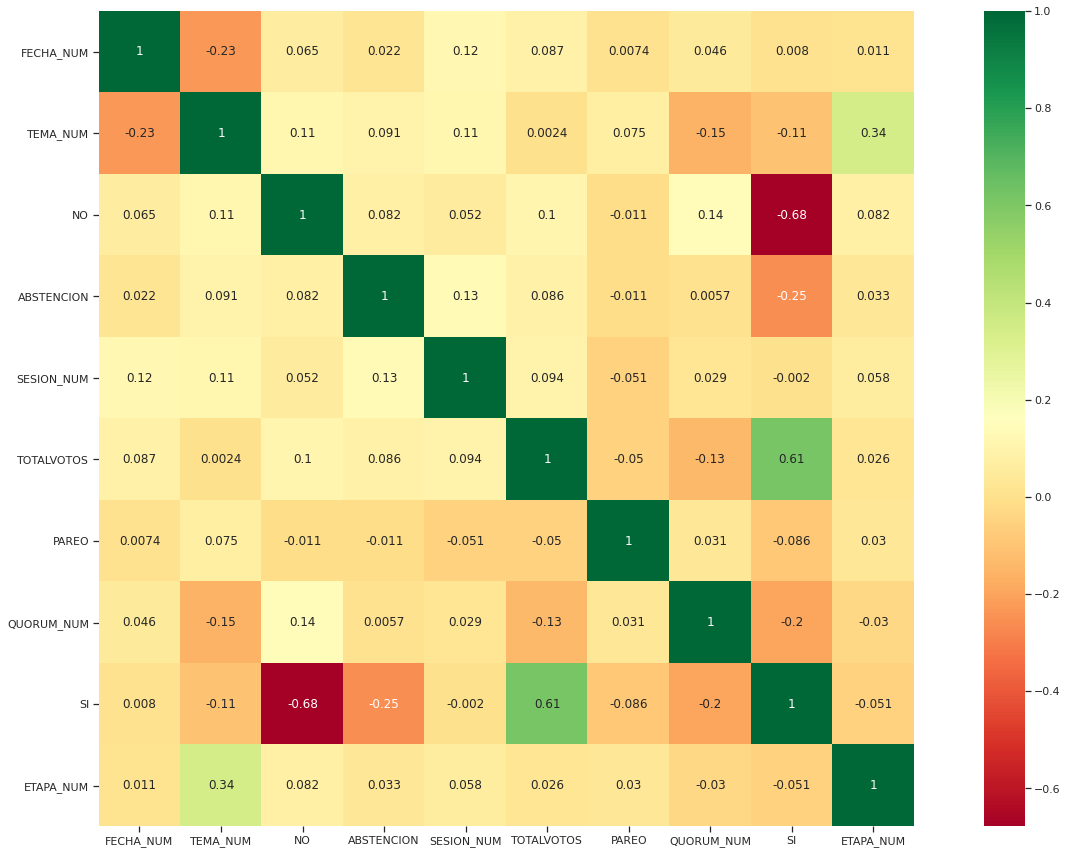

In [67]:
plt.figure(figsize=(25,15))
p=sns.heatmap(X_m.corr(), annot=True,cmap='RdYlGn',square=True)

**Análisis**
>Se puede observar que la relación entre las variables es bastante poca, hasta el punto de mencionar que no hay relación entre las variables con tal método de normalización, sin embargo se puede visualizar relaciones directas o inversas, de las cuales podemos definir tales columnas con cierto porcentaje mayor a otras que desde ya el mismo SelectKBest elegirá.


In [68]:
#En base al SelectKBest obtenemos las 3 columnas con mayor correlación
best=SelectKBest(k=3)
X_K = best.fit_transform(X_m, y_m)
X_K.shape
X_Kselect = best.get_support(indices=True)
# DataFrame con las mejores columnas en base a su correlacion decidida por el SelectKBest
X_mBest = pd.DataFrame(data=X_m ,columns = X_m.columns[X_Kselect])
print(X_m.columns[X_Kselect])

Index(['TEMA_NUM', 'NO', 'ETAPA_NUM'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Análisis**
>De acuerdo al método "SelectKBest", este nos mencionó las columnas como resultado las siguientes características con mayor correlación:
>
>* TEMA_NUM
*   ETAPA_NUM
*   NO


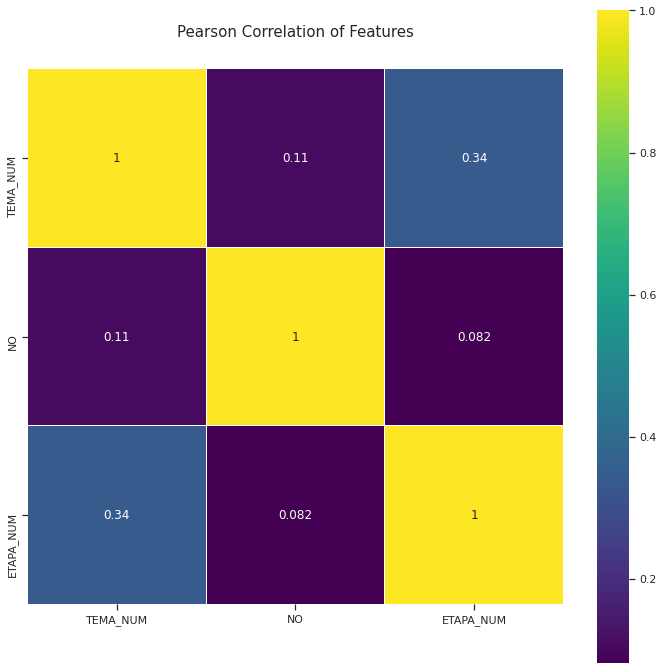

In [69]:
#Visualización de correlación de Features definidas por el SelectKBest
used_features = X_m.columns[X_Kselect]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(X_m[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**Análisis**


>Se puede apreciar que por lo menos entre las variables seleccionadas por el Algoritmo "SelectKBest", estas tiene un mínimo bastante bajo en correlación, obteniendo como máximo un 11% de correlación positiva y directa entre las columnas "NO" y "TEMA_NUM".


# Fase 4 - Modelamiento

> Ya obteniendo una data preparada y lista, sin valores Nan (o relacionados), con los valores categóricos dirigidos a sus procesos de transformación y demás, es por lo tanto un indicativo en donde se deberá de comenzar la fase de modelamiento, la cual estará pensada en "llevar" los datos a un ambiente de Algoritmos especializados en la predicción de ciertos valores, de los cuales nosotros definiremos.
>
>Es por consecuente que de acuerdo al Dataset que seleccionamos, se ha de definir la pregunta a la cual queremos responder, la cual sería en primera instancia:
>
>*   ¿Qué tipo de votación será utilizada respecto a tales para parámetros?
>
>La respuesta a esta pregunta (según ciertos parámetros y el mejor modelo que pueda predecir esto en futuras votaciones) nos dirá que tan interesados, responsables y comprometidos pueden llegar a estar tales senadores por cada sesión de votaciones en dichos temas planteados.
>
>Es por lo tanto, que debido a ser una cantidad la cual recae en un numero finito discreto, difiriendo de llegar a ser una regresión para ciertos datos, es que se ha de definir que el tipo de algoritmos más indicados para la respuesta a la pregunta que requerimos responder, es de tipo Clasificación. Por consecuencia es que se ha de implementar ciertos modelos relacionados a este tipo de modelos (valga la redundancia), pero que de igual forma se integrara algún modelo de regresión en donde podremos apreciar tanto el resultado que nos daría con tal Etiqueta denominada, como bien llegar a predecir otros tipos de datos para obtener una respuesta diferente a una pregunta diferente. Así bien, comienza tal fase de modelamiento.




In [70]:
# Visualización del numero correspondiente a cada Tipo de Votación
detVotEnd.iloc[:,[-3,-2]].groupby(by=['TIPOVOTACION2']).mean()

,TIPOVOTACION_NUM
TIPOVOTACION2,
Discusión general,0
Discusión informe de Comisión Mixta,1
Discusión particular,2
Discusión única,3


##Regresión Logistica

>Uno de los modelos que utilizaremos, será la regresión logística, que es un método estadístico que sirve o trata de modelar la probabilidad de una variable cualitativa en función de una o más variables. Esto quiere decir que, es útil cuando la variable es categórica, lo cual está relacionada con la etiqueta planteada.


###Entrenamiento

>Para comenzar a hacer este entrenamiento, al igual que en varios de los modelos propuestos, necesitaremos separar el conjunto de datos, por lo tanto es que en base a tener como resultado un conjunto de datos de entrenamiento y evaluación (pero de una forma algo diferente a lo anterior), en donde en origen al método "train_test_split" (el cual nos asegurara obtener datos de forma aleatoria de la muestra) tendremos de igual forma diversas variables para la validación como de la evaluación del modelo, es por esto, que lo mencionado podrá verse visualizado en el siguiente bloque de código.

In [71]:
# Utilizamos el train_test_split para generar las variables que seran utilizadas en el proceso de prediccion
Xtrain_rl, Xtest_rl, Ytrain_rl, Ytest_rl = train_test_split(X_mBest,y_m,test_size=0.2)

**Análisis**
> Se puede apreciar un tamaño de test de un 20%, el cual podria ser modificado en un futuro para intentar obtener mejores resultados.

In [72]:
# En base a la instancia del modelo de regresion logistica, realizamos en entrenamiento del modelo
mo1 = LogisticRegression(solver='lbfgs')
mo1.fit(Xtrain_rl, Ytrain_rl)
Yhat_rl = mo1.predict(Xtest_rl)
Yprob = mo1.predict_proba(Xtest_rl)
print(classification_report(Ytest_rl, Yhat_rl))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72        48
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         7

    accuracy                           0.55        85
   macro avg       0.14      0.24      0.18        85
weighted avg       0.32      0.55      0.41        85



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di


**Análisis**
> En base al método de clasificación de reportes, es que hemos obtenido una cierta comparación de los valores predichos con respecto la muestra destinada al "Ytest_rl", por lo cual se interpretó lo siguiente:
>
>*   Se obtiene que de toda la muestra sobre si se seleccionara el tipo de votación 0 (Discusión General), un 62% de precisión corresponden en ser etiquetados como *Discusión General*.
*   Se tiene que de toda la muestra de la matriz sobre las votaciones, predecimos un total de un 96% como dato a ser *Discusión General*, por la medida Recall.
*   El promedio del Recall y la precisión de la variable "1" (Discusión Informe de Comisión Mixta), es un f1-score de un 0%, mencionando que el rendimiento para determinar tal etiqueta es bastante deficiente.



###Sintonización del Modelo

In [73]:
# Instanciamos el modelo de regresion logistica y utilizamos el Grid para busqueda exhaustiva de valores
model_rl = LogisticRegression()

params_rl = {"max_iter": [20],
          "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
         }
grid_rl = GridSearchCV(estimator=model_rl, param_grid=params_rl,cv=5,scoring='accuracy')
grid_rl.fit(Xtrain_rl, Ytrain_rl,)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: Da

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [20],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

**Análisis**

>Se pueden observar que los parámetros utilizados (en primera instancia) para configurar tal modelo, los cuales serían:
>
>* max_iter: Dicho parámetro definirá el numero máximo de iteraciones tomadas para que los "solucionadores" converjan, así bien se hará la primera iteración de tal proceso de modelamiento con el valor de 20.
* solver: Tal parámetro aplica la opción de integrar los diversos métodos de opción multinomial, que recaen en ser algunos como; lbfgs", "sag", "saga" y "newton-cg.


###Evaluación

>En base al proceso tanto de validación como de entrenamiento de los datos, es que se han de visualizar las siguientes métricas y procesos para la evaluación de tal modelo, con el fin de ir determinando que tan acorde o ajustado podría llegar a ser tal modelo respecto al Dataset de las votaciones del BCN.

In [74]:
# Obtenemos las puntuaciónes media validada de forma cruzada y los mejores parametros para el modelo
print(grid_rl.best_score_)
print(grid_rl.best_params_)

0.6902546093064093
{'max_iter': 20, 'solver': 'newton-cg'}


**Análisis**

> En base a esta ejecución, se muestra e imprimen los mejores totales y parámetros, gracias a la librería liblinear, lo que da como el mejor porcentaje de puntuación con un valor de un 69%, lo que indica que se puede determinar una probabilidad de precisión en base a resultados del Dataset o Modelo de Votación.

In [75]:
# Obtenemos los resultados del grid_rl con las mejores configuraciones del parámetro candidato.
pd.DataFrame(grid_rl.cv_results_).iloc[grid_rl.best_index_]

mean_fit_time                                      0.0389368
std_fit_time                                      0.00478528
mean_score_time                                   0.00157933
std_score_time                                   0.000469654
param_max_iter                                            20
param_solver                                       newton-cg
params               {'max_iter': 20, 'solver': 'newton-cg'}
split0_test_score                                   0.705882
split1_test_score                                   0.705882
split2_test_score                                   0.647059
split3_test_score                                   0.705882
split4_test_score                                   0.686567
mean_test_score                                     0.690255
std_test_score                                     0.0228567
rank_test_score                                            1
Name: 0, dtype: object

**Análisis** 

> Respecto a los resultados salientes sobre tal dictado de claves el cual fue importado en un DataFrame, podemos ver ciertos valores, de los cuales algunos a resaltar podrán ser:
>
>* param_max_iter: Este nos menciona el máximo de iteración que realizara el modelo en base a los parámetros ingresado, el cual demuestra ser de unas 20 iteraciones
*   std_fit_time: El resultado obtenido, es de un 0.005% el cual nos menciona sobre el ajuste del entrenamiento del modelo en cuanto que tan preciso podría llegar a ser para posteriores predicciones.


In [76]:
# Obtencion de metricas en base a utilizado grid_rl
Yhat_rl = grid_rl.predict(Xtest_rl)
Yprob_rl = grid_rl.predict_proba(Xtest_rl)
print(classification_report(Ytest_rl, Yhat_rl))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75        48
           1       1.00      1.00      1.00         4
           2       0.50      0.04      0.07        26
           3       1.00      0.29      0.44         7

    accuracy                           0.64        85
   macro avg       0.78      0.58      0.57        85
weighted avg       0.63      0.64      0.53        85



**Análisis**

> En base al método de clasificación de reportes y en comparación a las métricas obtenidas anteriormente, es que hemos obtenido una cierta comparación de los valores predichos con respecto a la muestra destinada al "Ytest_rl", por lo cual se interpretó lo siguiente:
>
>*   Se obtiene que de toda la muestra sobre el tipo de votaciones Discusión Única (variable "3"), obtenemos un 77% más de precisión quedando en un 100% en comparación a antes, los cuales corresponden en ser etiquetados como *4* .
*   Se tiene que de toda la muestra de la matriz, predecimos un total de un 0%, por lo cual descendimos un 5% aproximadamente respecto a antes, en obtener como dato a ser *Discusión Particular*, por la medida Recall.
*   El promedio del Recall y la precisión de la variable "Discusión Informe de Comisión Mixta", es un f1-score de un 57%, aumentando un 57% respecto a las anteriores mediciones.



In [77]:
X_new = pd.DataFrame({'NO': [0], 'TEMA_NUM': [159], 'ETAPA': [4]})
grid_rl.predict(X_new)

array([3])

**Análsis**
> De acuerdo a los parametros definidos, es que nuestro modelo llego a la predicción de que para tal tema de votación (el cual es uno de nuestro parametros), probablemente sea utilizado una votación de tipo Discución Particular (3).

>Cabe recalcar, que si bien obtuvimos ciertas mejoras en nuestro modelo, ya sea debido a la implementación de ciertos parámetros o bien uso de cierta librerías u otros métodos, es que posiblemente se esté experimentando la falta de un StandarScaler, ya que obtener porcentajes con un valor de 0%, podría indicar que la cantidad de datos para cada clasificación difiere mucho el uno del resto, por lo cual en una posterior iteración sería un cambio prudente a intentar integrar, de esta forma podríamos ver mejores resultados respecto a la pregunta que hemos de responder para nuestra predicción.

##Regresion Lineal Multiple

> Como se mencionó, podremos aplicar Algoritmos de Regresión en donde en primera instancia hemos decidido por determinar usar una Regresión Lineal Múltiple, ya que si se le compara con su "Hermano Menor", la Regresión Lineal Simple solamente utiliza una variable independiente para predecir una variable dependiente, en donde nosotros creemos que a pesar de que este modelo es usado en muy pocos escenarios, el Modelo "RLM" podría ajustarse mejor a nuestro Dataset de columnas seleccionadas. Así bien, esto no estará del todo comprobado hasta que posteriormente o bien en futuras iteraciones (ya que este proceso de ML podría durar casi "eternamente") se pruebe con tal modelo de Regresión Lineal Simple.
>
>Cabe recalcar que para utilizar tal modelo, hemos de cambiar tal pregunta a responder, ya que en este caso nuestra etiqueta debería ser una más enfocada a números continuos reales. Es por esto que nuestra pregunta y enfoque será:
>* ¿Cuántos Votos Si obtendríamos dependiendo de ciertas variables?
>
>RLM: Regresión Lineal Múltiple*


In [78]:
#Definimos nuestra Data de dependiente e independiente.
X_mRLM = X_m.drop('SI', axis=1)
y_mRLM = X_m['SI']

In [79]:
#En base al SelectKBest obtenemos las 3 columnas con mayor correlación
best=SelectKBest(k=3)
X_KRLM = best.fit_transform(X_mRLM, y_mRLM)
X_KRLM.shape
X_KselectLM = best.get_support(indices=True)
# DataFrame con las mejores columnas en base a su correlacion decidida por el SelectKBest
X_mBestLM = pd.DataFrame(data=X_mRLM ,columns = X_m.columns[X_Kselect])
print(X_m.columns[X_KselectLM])

Index(['NO', 'ABSTENCION', 'TOTALVOTOS'], dtype='object')


### Entrenamiento
> Generalmente para realizar este entrenamiento, necesitaremos separar el conjunto de datos, obtenido un conjunto de datos de entrenamiento y evaluación, por lo tanto, en base al método "train_test_split" tendremos como resultado diversas variables para la utilización tanto de la validación como de la evaluación del modelo, así bien, esto podrá verse visualizado en el siguiente bloque de código.

In [80]:
# Se separan las variables predictoras y la predecidas
X_train_rlm, X_test_rlm, y_train_rlm, y_test_rlm = train_test_split(X_mBestLM, y_m,test_size=0.2,random_state=29)

**Análisis**

> Se puede apreciar un tamaño de test de un 20%, el cual podría ser modificado en un futuro para intentar obtener mejores resultados.

In [81]:
# Entrenamiento del modelo
modelo_rlm = LinearRegression()
modelo_rlm.fit(X_train_rlm, y_train_rlm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Validación

In [82]:
# Validación del modelo
y_pred_rlm = modelo_rlm.predict(X_test_rlm)

### Evaluación
> En base al proceso tanto de validación como de entrenamiento de los datos, es que se han de visualizar las siguientes métricas para la evaluación de tal modelo, con el fin de ir determinando que tan acorde o ajustado podría llegar a ser tal modelo respecto al Dataset del Clima en Australia. Por lo tanto, para las métricas a interpretar serán las siguientes:

In [83]:
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test_rlm, y_pred_rlm))
print("MSE: %.2f" % mean_squared_error(y_pred_rlm, y_test_rlm))
print("Score del modelo : %.2f" % modelo_rlm.score(X_train_rlm, y_train_rlm))

R2 :0.09
MSE: 1.25
Score del modelo : 0.05


**Análisis**

> Mediante estos resultados, se puede interpretar del R2 o R Cuadrado,
que presenta un 9% de variación de las variables de respuesta. Este porcentaje quiere decir, que mientras El R2 presente este porcentaje bajo, es más problemático cuando se desea crear predicciones.
>
>En base al MSE, que se debe a un 125% se puede interpretar que estos datos están sobre ajustado para obtener un modelo de datos optimo, lo cual indica que nuestro modelo es bastante "malo" para realizar predicciones, probablemente en futuras iteraciones se realicen cambios para aumentar la eficacia en parámetros u métodos para obtener el mejor resultado posible y llegar a un veredicto, sobre si servirá de algún modo al dataset o bien no.



## Random Forest

>Un algoritmo diseñado como un ensamblador, el cual su funcionamiento se detalla en utilizar una agrupación de árboles del conocido "Árbol de Decisión", en donde además de deber presentar una amplia diversidad, este de igual manera presenta una gran utilidad tanto para modelos de tipo regresión como de clasificación, abriendo las posibilidades para ser utilizado. Esto es debido a ser un *Ensamblador*, el cual proviene del tipo Bagging, el cual en base a combinar diversos modelos "débiles" para formar uno más robusto, este de entre todos esos modelos agrupados, buscara el "árbol" que obtenga el mejor resultado posible en modelos de dataset centrados en la clasificación. 
>
>Así bien, para obtener un buen data set formado, es que se utilizó un dataset proveniente del escalamiento realizado para normalizar la data, en donde posteriormente también se le será aplicado el mismo SelectKBest. Así bien, el mismo dataset mencionado provoca una cierta relación con el modelo, el cual nos permitiría obtener un mejor resultado, mediante el rendimiento de tal modelo gracias a la curva ROC_AUC.


In [84]:
#Definimos nuestra Data de dependiente e independiente.
X_mRF = detVotMScaler.drop('TIPOVOTACION_NUM', axis=1)
y_mRF = detVotMScaler['TIPOVOTACION_NUM']

In [85]:
#En base al SelectKBest obtenemos las 3 columnas con mayor correlación
best=SelectKBest(k=3)
X_KRF = best.fit_transform(X_mRF, y_mRF)
X_KRF.shape
X_KselectRF = best.get_support(indices=True)
# DataFrame con las mejores columnas en base a su correlacion decidida por el SelectKBest
X_mBestRF = pd.DataFrame(data=X_mRLM ,columns = X_m.columns[X_Kselect])
print(X_m.columns[X_KselectRF])

Index(['NO', 'SESION_NUM', 'ETAPA_NUM'], dtype='object')


**Análisis**

>De acuerdo al metodo "SelectKBest", este nos menciono las columnas  como resultado las siguientes caracteristicas con mayor correlación:
>
>*  SESION_NUM
*   ETAPA_NUM
*   NO

### Entrenamiento

>Al igual que en varios de los modelos propuestos, necesitaremos separar el conjunto de datos, por lo tanto en base al método "train_test_split" (el cual nos asegurara obtener datos de forma aleatoria de la muestra) tendremos de igual forma, diversas variables para la validación como de la evaluación del modelo, es por esto, que lo mencionado podrá verse visualizado en el siguiente bloque de código.

In [86]:
#Separar los datos de "train" en entrenamiento y prueba para probar el modelo
Xtrain_rf, Xtest_rf, Ytrain_rf, Ytest_rf = train_test_split(X_mBestRF,y_mRF.values,test_size=0.2)

**Análisis**
> El proceso del train_test_split se compensa con un 20% de los datos de la muestra dedicados para la prueba.

In [87]:
#Se Aplica el Modelo con los parametros que requeriremos para ajustarlo 
model_rf = RandomForestClassifier(n_estimators=100, class_weight="balanced",
                               max_features = 'sqrt', verbose=2, max_depth=6,
                               oob_score=True, random_state=50)


**Análisis**

> De acuerdo a los parámetros preestablecidos, hasta el momento se pueden describir algunos como
>
>* n_estimators: El cual definimos como 100 árboles en el mismo "bosque" Algoritmo.
>*max_features: La cantidad de características a considerar fue seleccionado en "sqrt", lo cual es como si fuera una opción automática.
* max_depth: La profundidad máxima del árbol es definida en 6 nodos que se expandieran hasta que todas las hojas sean "puras".


In [88]:
#Entrenamiento del Modelo
model_rf.fit(Xtrain_rf, Ytrain_rf)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=50, verbose=2,
                       warm_start=False)

###Validación

>Se procede a realizar la validación de tales resultados para ser posteriormente analizados.

In [89]:
#Se crea un metodo el cual sera usado para diversos datos de prueba y predicción
LABELS = detVotEnd['TIPOVOTACION2'].unique()
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


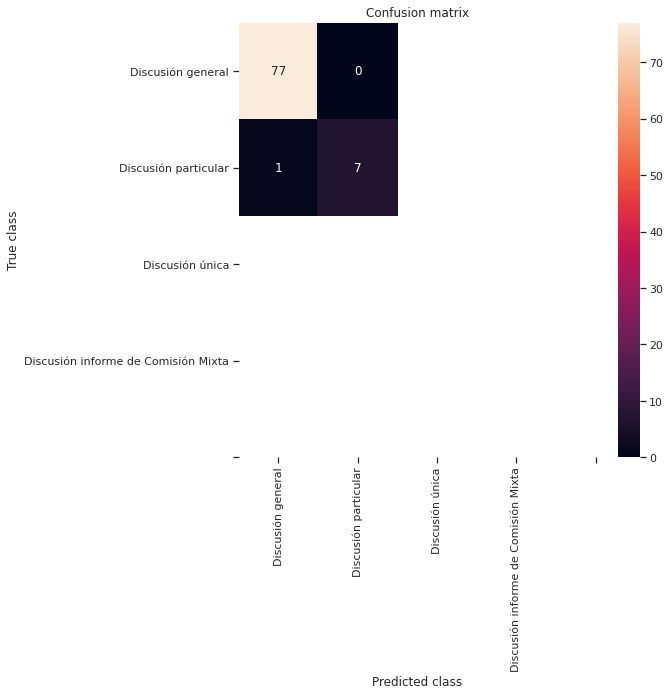

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.88      0.93         8

    accuracy                           0.99        85
   macro avg       0.99      0.94      0.96        85
weighted avg       0.99      0.99      0.99        85



In [90]:
#Se visualiza el mapa de confusion de acuerdo a tales datos entrenados 
pred_y_rf = model_rf.predict(Xtest_rf)
mostrar_resultados(Ytest_rf, pred_y_rf)

**Análisis**
> De acuerdo a las métricas observadas es que se puede analizar lo siguiente:
>
>*    F1-Score: Nos encontramos con un valor de hasta un 95% de rendimiento entre exhaustividad y precisión para detectar la variable que probablemente es "Discusión Única" (1).
>*    Precisión: Si bien la precisión no es una métrica muy confiable para cuando obtenemos datos no "balanceados", obtenemos un valor de un 98% el cual representa que de los tipos de votación usados, serán realmente usados como ""Discusión General" (0) un 99%,  por lo tanto el modelo se equivocara en un 1% de las veces, cuando se prediga si un tipo de votación corresponde a tal tipo de valor.
>
>Por otro lado, si bien se aplicó normalización para poder aplicar tal modelo nuestro trabajo, dejando a 2 de las variables clasificatorias "fuera de los resultados", es que de acuerdo a la matriz de confusión se puede apreciar que se obtuvieron 77 caso en donde son catalogado como Verdaderos Positivos, lo cual es descrito como que tal valor a predecir fue predicho por el mismo algoritmo respecto a su valor real. Por otro lado, de igual forma obtenemos 1 caso erróneo en donde el modelo definido como que tal valor no era el determinado pero realmente si lo era, quedando en un Falso Positivo, y dando como resultado obtener 7 casos como Falsos Negativos, lo cual resulta en unas métricas bastante buenas como valores concluyentes.

### Evaluación

>Finalmente luego de realizar tal validación, se continuara a concluir con la evaluación de tal modelo definiendo el análisis de la metrica o curva "roc_auc".

In [91]:
# Calculate roc auc
#y_true2 = type_of_target(Ytest_rf)
roc_value = roc_auc_score(Ytest_rf,pred_y_rf, multi_class="ovr")
print(roc_value)

0.9375


**Análisis**

> Como es apreciable obtenemos un valor de un 95% (aproximadamente) para la medida del valor de la curva roc_auc, por lo tanto visualizando este mismo de forma objetiva, se podría apreciar por un lado que obtenemos un gran rendimiento respecto a los anteriores modelos, sin embargo, dicho valor también podría llegar a indicar un sobre ajuste u overffiting, dándonos como conclusión que si bien el rendimiento es muy bueno, el algoritmo podría estarse memorizando tal proceso de predicción. Por otro lado, es de destacar que para el uso del mismo modelo, fue seleccionado el dataset en base al proceso de escalamiento (MinMaxScaler) que se le realizo, por lo cual dicha etiqueta planteada anteriormente, se redujo de 4 variables en el Feature, a solo 2, ya que de esta forma obtendríamos un variable binaria y no una enfocada a alguna clasificación mas allá de 2 opciones (que es nuestro caso), por consecuencia será recomendable buscar o utilizar otro método de prueba para tal ensamblador o bien para otro ensamblador que permita variables no binarias, con la finalidad de visualizar si obtendríamos mejores resultados con una etiqueta sin escalar.

#Conclusión

> Para finalizar, en dicha iteración se ha demostrado una buena fase de modelamiento, en donde se incluyeron modelos tanto de regresión (aunque no hayan sido los más indicados) como de clasificación (los más indicados), en donde si bien existían medidas que no dejaron satisfecho con su valor, ya se posee una base sobre la cual se puede seguir mejorando y cambiando ciertos parámetros para obtener el mejor resultado posible, por lo cual el modelo quien llego a cumplir con unos valores más aceptados, fue el modelo de Regresión Logística, en donde esto pudo ser apreciado en base a una prueba de predicción dando como resultado cierto valor, el cual si bien posiblemente sea carente de entrenamiento, este no se encuentra al borde ni de un overffiting (como lo es RandomForest) como de un gran underfitting. 
>
>Es por esto que los demás modelos quedara determinar si con otras mejoras pueden llegar a cumplir con tales expectativas, aun así el conocimiento que se obtuvo mediante tales análisis sigue siendo bastante útil, promoviendo tal resultado gracias al tratamiento de valores NaN/None y de variables categóricas que se integró en la segunda parte (entre otros tratamientos), y que de momento fue lo necesario para llegar a la etapa de Modelamiento, ya que probablemente en futuras versiones se ocupen otros tratamientos de datos para verificar resultados en la fase desarrollada en esta versión.

> Por último, se le deja invitado a esperar la siguiente parte de este proceso analítico, en donde estará centrado fuertemente en el **Despliegue de los Datos**, realizando procesos como la de la integración del programa Power BI,
en donde se podrá visualizar de mejor manera todo el proceso realizado en estas iteraciones. Así bien, todo proceso de inicio para el despliegue, probablemente sea visualizado en esta herramienta de Google en la Nube (Colab), la cual gracias a su disponibilidad de librerías y funciones más útiles que se pueda usar, nos dio la posibilidad de llevar tareas tanto de análisis, preprocesamiento y transformación de datos, y actualmente de modelamiento, todo esto con el fin de lograr un esperado resultado para llegar a una buena iteración de con el trabajo y dar para estos datos un enfoque del Machine Learning.



